In [154]:
import pandas as pd
import numpy as np
import ace_tools_open as tools
from matplotlib import pyplot as plt
import textwrap

In [155]:
# Load the uploaded CSV file to inspect its structure
file_path = './wandb/wandb_export_2024-12-10T17_21_47.538-05_00-deepspeed-2GPU-zero2.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
data.head()

,Name,Device Time Total (ms),CPU Time Total (ms),Self Device Time Total (ms),Self CPU Time Total (ms),Calls,Input Shapes,Device Memory Usage (MB),Self Device Memory Usage (MB),CPU Memory Usage (MB),Self CPU Memory Usage (MB)
0,ProfilerStep*,9465.453433,31005.323544,0.0,14069.304047,10,NaN,0.000000,-405573.818359,0.000004,-0.002300
1,enumerate(DataLoader)#_MultiProcessingDataLoad...,0.000000,7.076800,0.0,6.637022,21,NaN,0.000000,0.000000,0.000000,0.000000
2,aten::to,242.136779,249.591782,0.0,3.068498,2430,NaN,9504.228516,0.000000,0.000229,0.000000
3,aten::_to_copy,242.136779,246.523284,0.0,7.830501,940,NaN,9504.228516,-294.474609,0.000229,0.000000
4,aten::empty_strided,0.000000,20.086903,0.0,16.363949,1400,NaN,16254.233398,16254.233398,0.000229,0.000229


./catagorized_wandb/categorized_deepspeed_2GPU_zero2.csv


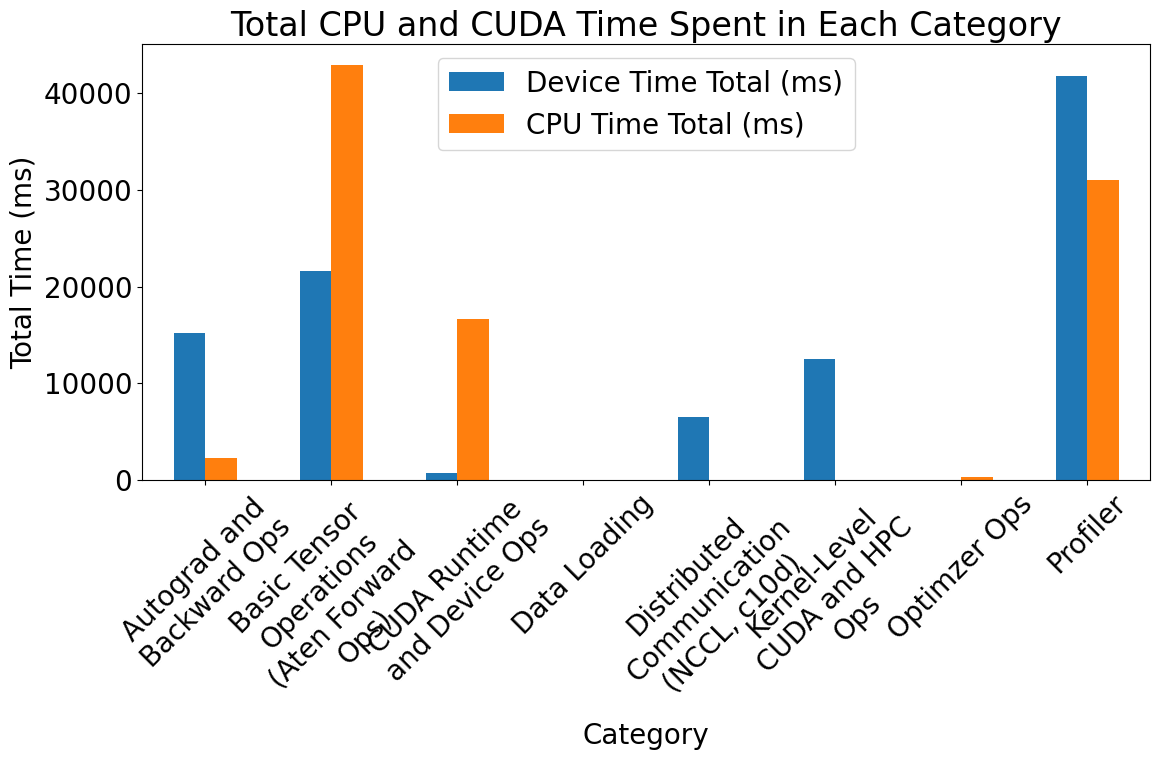

In [ ]:


# Define categories and corresponding keywords or patterns
categories = {
    "Data Loading": ["enumerate(DataLoader)", "_MultiProcessingDataLoaderIter.__next__"],
    "Profiler": ["ProfilerStep*"],
    "Basic Tensor Operations (Aten Forward Ops)": [
        "aten::to", "aten::_to_copy", "aten::empty_strided", "aten::copy_", "aten::view", "aten::arange",
        "aten::empty", "aten::resize_", "aten::unsqueeze", "aten::as_strided", "aten::embedding", "aten::reshape",
        "aten::index_select", "aten::add", "aten::dropout", "aten::layer_norm", "aten::native_layer_norm",
        "aten::addmm", "aten::split", "aten::narrow", "aten::slice", "aten::permute",
        "aten::scaled_dot_product_attention", "aten::_scaled_dot_product_efficient_attention", "aten::transpose",
        "aten::_efficient_attention_forward", "aten::mul", "aten::pow", "aten::result_type", "aten::tanh",
        "aten::linear", "aten::t", "aten::matmul", "aten::mm", "aten::_unsafe_view", "aten::contiguous",
        "aten::clone", "aten::empty_like", "aten::cross_entropy_loss", "aten::log_softmax", "aten::_log_softmax",
        "aten::nll_loss_nd", "aten::nll_loss", "aten::nll_loss_forward", "aten::mean", "aten::detach",
        "aten::ones_like", "aten::fill_", "aten::zero_", "aten::zeros", "aten::view_as",
        "aten::_has_compatible_shallow_copy_type", "aten::sum", "aten::add_", "aten::cat",
        "aten::flatten_dense_tensors", "aten::unflatten_dense_tensors", "aten::linalg_vector_norm", "aten::isnan",
        "aten::ne", "aten::isinf", "aten::abs", "aten::eq", "aten::logical_or", "aten::max", "aten::is_nonzero",
        "aten::item", "aten::_local_scalar_dense", "aten::lift_fresh", "aten::detach_", "aten::select", "aten::stack",
        "aten::squeeze", "aten::div", "aten::clamp", "aten::reciprocal", "aten::mul_", "aten::random_",
        "aten::scalar_tensor", "aten::native_dropout", "aten::div_", 
        # Newly added
        "aten::set_","aten::chunk", "aten::expand", "aten::_foreach_norm", "aten::foreach_mul", "aten::foreach_add", 
        "aten::foreach_lerp", "aten::foreach_addcmul", "aten::_foreach_sqrt", "aten::foreach_div", 
        "aten::foreach_addcdiv", "aten::_foreach_mul_", "aten::_foreach_add_","aten::_foreach_lerp_",
        "aten::_foreach_addcmul_","aten::_foreach_div_","aten::_foreach_addcdiv_","aten::logical_not",
        "aten::linalg_norm","aten::record_stream"
    ],
    "Autograd and Backward Ops": [
        "autograd::engine::evaluate_function", "Backward", "_backward", "aten::nll_loss_backward",
        "aten::_log_softmax_backward_data", "aten::slice_backward", "aten::native_layer_norm_backward",
        "aten::tanh_backward", "aten::_scaled_dot_product_efficient_attention_backward",
        "aten::_efficient_attention_backward", "aten::embedding_backward", "aten::embedding_dense_backward",
        # Newly added
        "torch::autograd::AccumulateGrad", "detach", "detach_"
    ],
    "CUDA Runtime and Device Ops": [
        "cudaMemcpyAsync", "Memcpy HtoD", "cudaStreamSynchronize", "cudaDeviceSynchronize", "cudaLaunchKernel",
        "cudaPointerGetAttributes", "cudaOccupancyMaxActiveBlocksPerMultiprocessorWithFlags", "cudaFuncSetAttribute",
        "cudaStreamIsCapturing", "cudaMemsetAsync", "cudaOccupancyMaxActiveBlocksPerMultiprocessor", "cudaFuncGetAttributes",
        "cudaStreamWaitEvent", "cudaDeviceGetAttribute", "cudaEventRecord", "cudaPeekAtLastError", "cudaEventQuery",
        "cudaStreamGetCaptureInfo_v2", "cudaLaunchKernelExC", "cudaHostAlloc", "cudaFree", "cudaMalloc", "Memcpy DtoH",
        "Memcpy Pageable -> Device",
        "Memset (Device)",
        # Newly added
        "Memcpy HtoD (Pinned -> Device)","Memcpy DtoD (Device -> Device)","Memcpy HtoD (Pageable -> Device)",
        "Memcpy PtoP (Device -> Device)","cudaEventSynchronize","cudaEventElapsedTime"
        
    ],
    "Optimzer Ops": ['Optimizer.step#AdamW.step', 'Optimizer.step#DeepSpeedCPUAdam.step'],
    "Distributed Communication (NCCL, c10d)": [
        "c10d::allreduce_", "nccl:all_reduce", "ncclDevKernel_AllReduce_Sum", "nccl:_all_gather_base",
        "ncclDevKernel_AllGather", "record_param_comms", "c10d::_allgather_base_",
        # Newly added
        'ncclDevKernel_Reduce_Sum_f32_RING_LL(ncclDevComm, unsigned long, ncclWork)**',
        "Broadcast", "Scatter", "Gather", "ReduceAddCoalesced",
        "ncclDevKernel_Reduce_Sum_f32_RING_LL(ncclDevComm*, unsigned long, ncclWork*)",
        "c10d::broadcast_","nccl:broadcast","c10d::_reduce_scatter_base_","nccl:_reduce_scatter_base",
        "c10d::barrier"
    ],
    "Model and Data Parallel": [
        "DataParallel.forward",'DistributedDataParallel.forward', "torch::distributed::reducer::mul_out",
        "torch.distributed.ddp.reducer::copy_bucket_to_grad"
        ],
    "Kernel-Level CUDA and HPC Ops": [
        "cutlass", "void at::native::", "elementwise_kernel", "vectorized_elementwise_kernel", "reduce_kernel",
        "ampere_sgemm", "fmha_cutlass", "at_cuda_detail::cub"
    ]
}

# Function to classify based on keywords
def classify_function(name):
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in name:
                return category
    return "Uncategorized"

# Apply classification
data['Category'] = data['Name'].apply(classify_function)

# Save the categorized data to a new CSV
output_path = './catagorized_wandb/categorized_deepspeed_2GPU_zero2.csv'
# data.to_csv(output_path, index=False)

print(output_path)

# Count total CUDA and CPU time spent in each category
category_times = data.groupby('Category')[['Device Time Total (ms)', 'CPU Time Total (ms)']].sum()
category_times

# Plot the total time spent in each category, no log-log scale, each class with two bars for CPU and CUDA time, the catagory name on x axis is wrapped to avoid overlap
fig, ax = plt.subplots(figsize=(12, 8))
category_times.plot(kind='bar', ax=ax, log=False)
ax.set_xticklabels([textwrap.fill(text, 15) for text in category_times.index], rotation=45, ha='center')
ax.set_xlabel('Category')
ax.set_ylabel('Total Time (ms)')
ax.set_title('Total CPU and CUDA Time Spent in Each Category')
plt.tight_layout()
# Set font to a larger size
plt.rcParams.update({'font.size': 16})

plt.show()


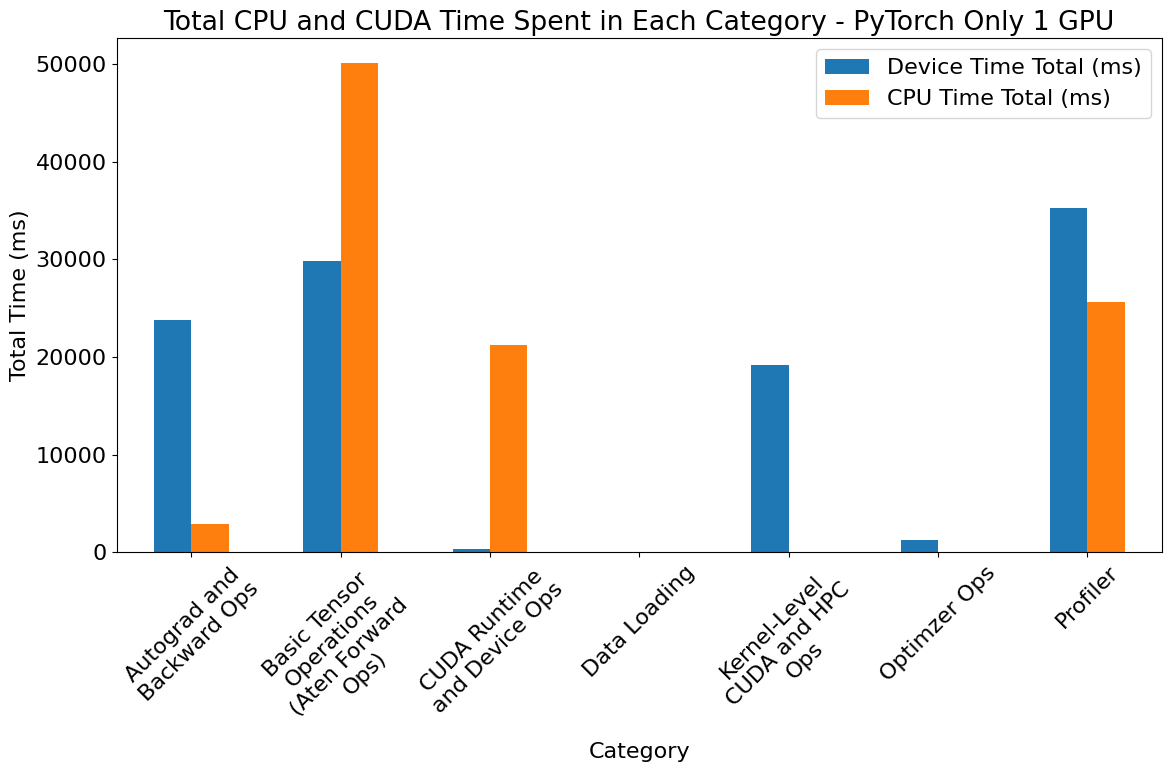

Uncategorized: ncclDevKernel_Reduce_Sum_f32_RING_LL(ncclDevComm*, unsigned long, ncclWork*), Distributed Communication (NCCL, c10d), True
Keyword: c10d::allreduce_ False
Uncategorized: ncclDevKernel_Reduce_Sum_f32_RING_LL(ncclDevComm*, unsigned long, ncclWork*), Distributed Communication (NCCL, c10d), True
Keyword: nccl:all_reduce False
Uncategorized: ncclDevKernel_Reduce_Sum_f32_RING_LL(ncclDevComm*, unsigned long, ncclWork*), Distributed Communication (NCCL, c10d), True
Keyword: ncclDevKernel_AllReduce_Sum False
Uncategorized: ncclDevKernel_Reduce_Sum_f32_RING_LL(ncclDevComm*, unsigned long, ncclWork*), Distributed Communication (NCCL, c10d), True
Keyword: nccl:_all_gather_base False
Uncategorized: ncclDevKernel_Reduce_Sum_f32_RING_LL(ncclDevComm*, unsigned long, ncclWork*), Distributed Communication (NCCL, c10d), True
Keyword: ncclDevKernel_AllGather False
Uncategorized: ncclDevKernel_Reduce_Sum_f32_RING_LL(ncclDevComm*, unsigned long, ncclWork*), Distributed Communication (NCCL, c1

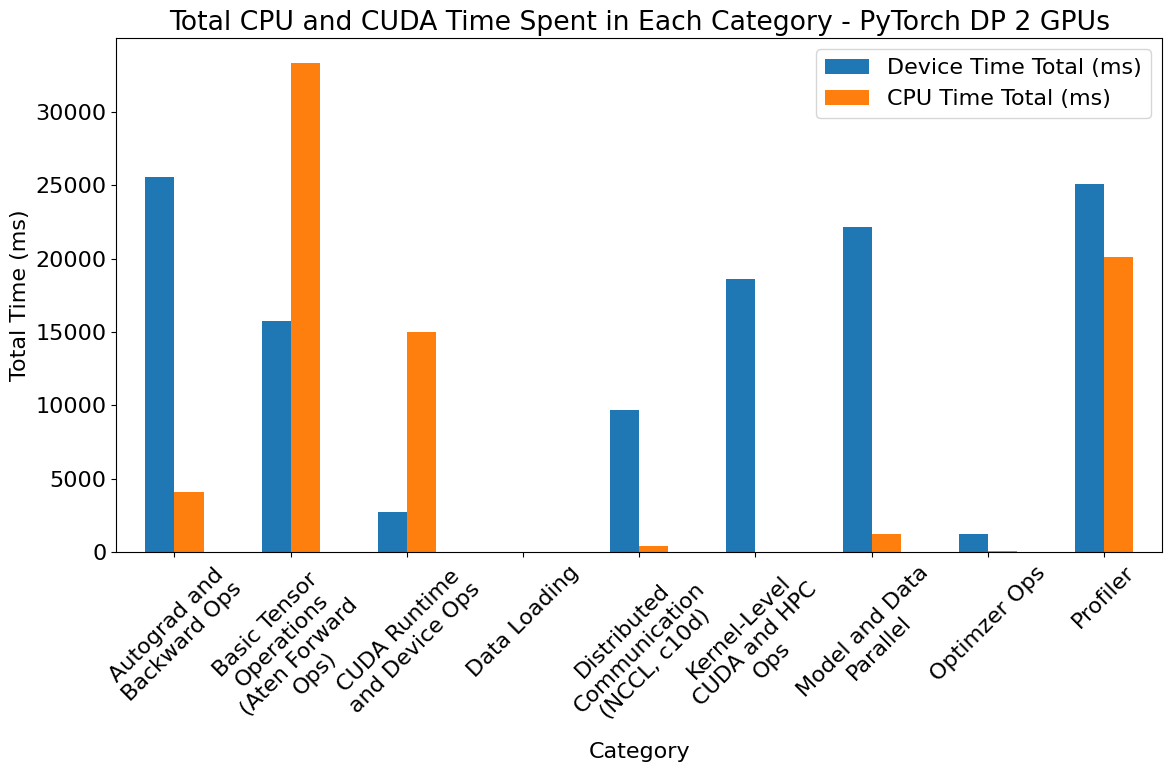

Uncategorized: ncclDevKernel_Reduce_Sum_f32_RING_LL(ncclDevComm*, unsigned long, ncclWork*), Distributed Communication (NCCL, c10d), True
Keyword: c10d::allreduce_ False
Uncategorized: ncclDevKernel_Reduce_Sum_f32_RING_LL(ncclDevComm*, unsigned long, ncclWork*), Distributed Communication (NCCL, c10d), True
Keyword: nccl:all_reduce False
Uncategorized: ncclDevKernel_Reduce_Sum_f32_RING_LL(ncclDevComm*, unsigned long, ncclWork*), Distributed Communication (NCCL, c10d), True
Keyword: ncclDevKernel_AllReduce_Sum False
Uncategorized: ncclDevKernel_Reduce_Sum_f32_RING_LL(ncclDevComm*, unsigned long, ncclWork*), Distributed Communication (NCCL, c10d), True
Keyword: nccl:_all_gather_base False
Uncategorized: ncclDevKernel_Reduce_Sum_f32_RING_LL(ncclDevComm*, unsigned long, ncclWork*), Distributed Communication (NCCL, c10d), True
Keyword: ncclDevKernel_AllGather False
Uncategorized: ncclDevKernel_Reduce_Sum_f32_RING_LL(ncclDevComm*, unsigned long, ncclWork*), Distributed Communication (NCCL, c1

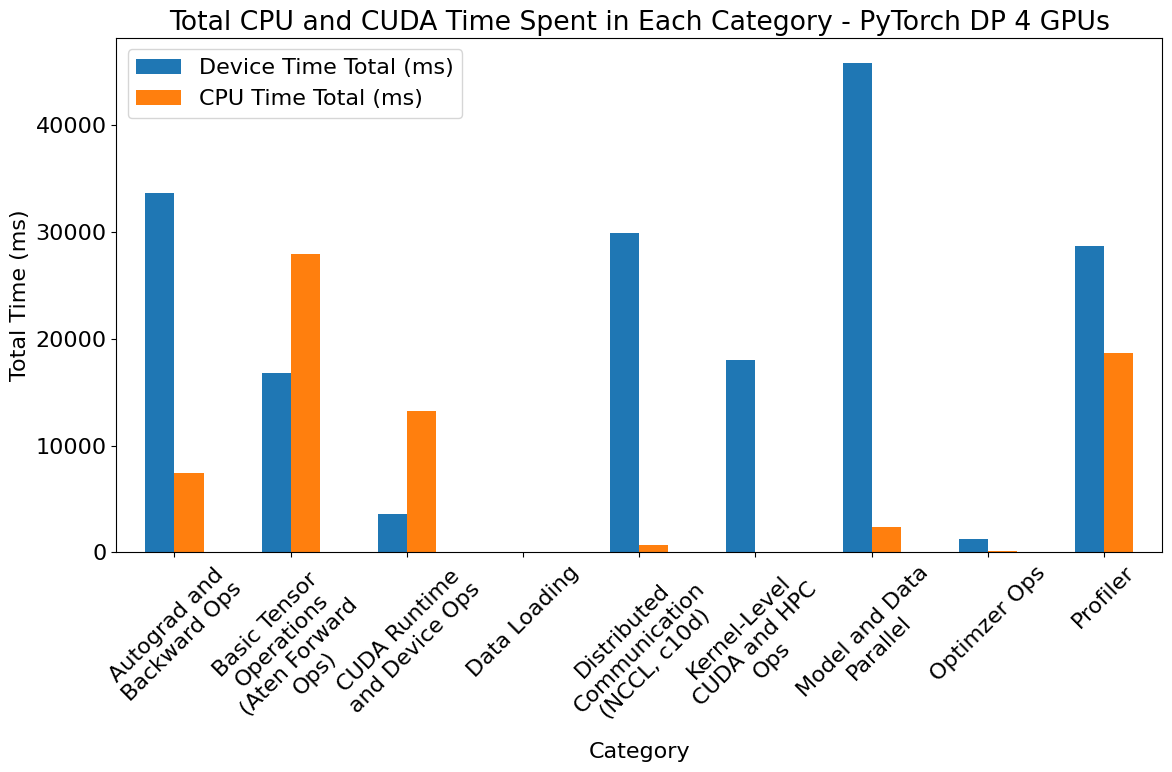

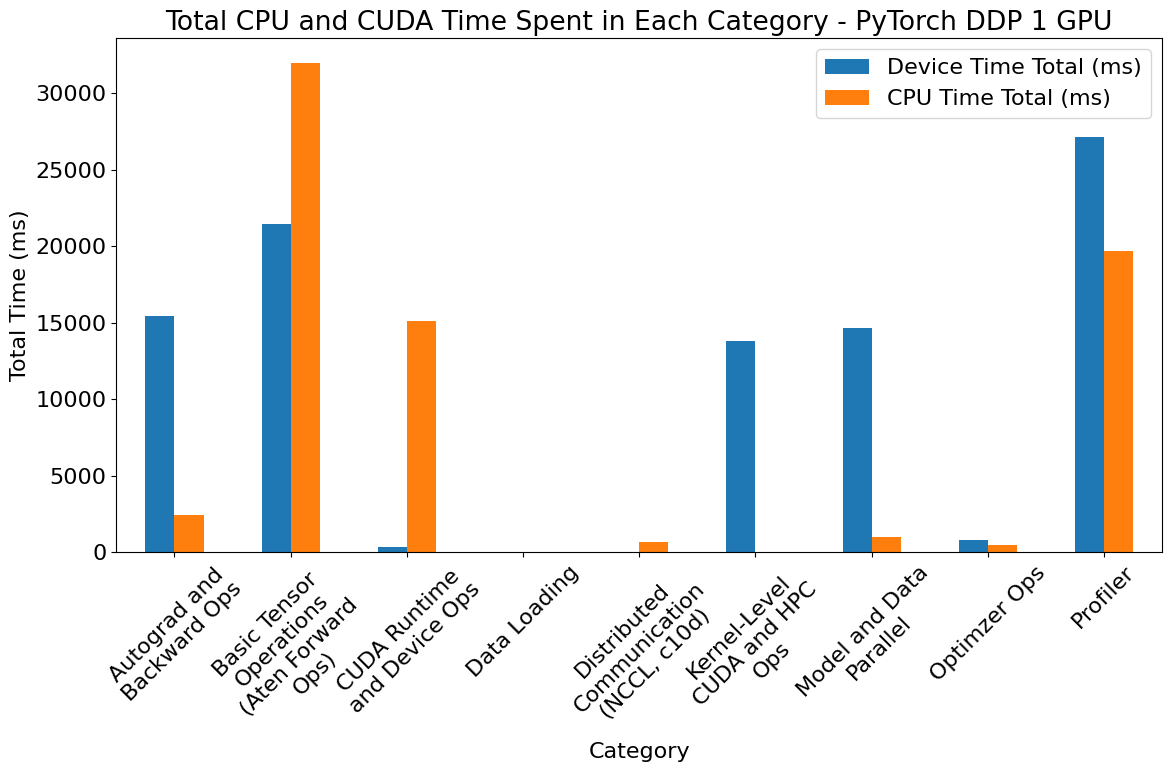

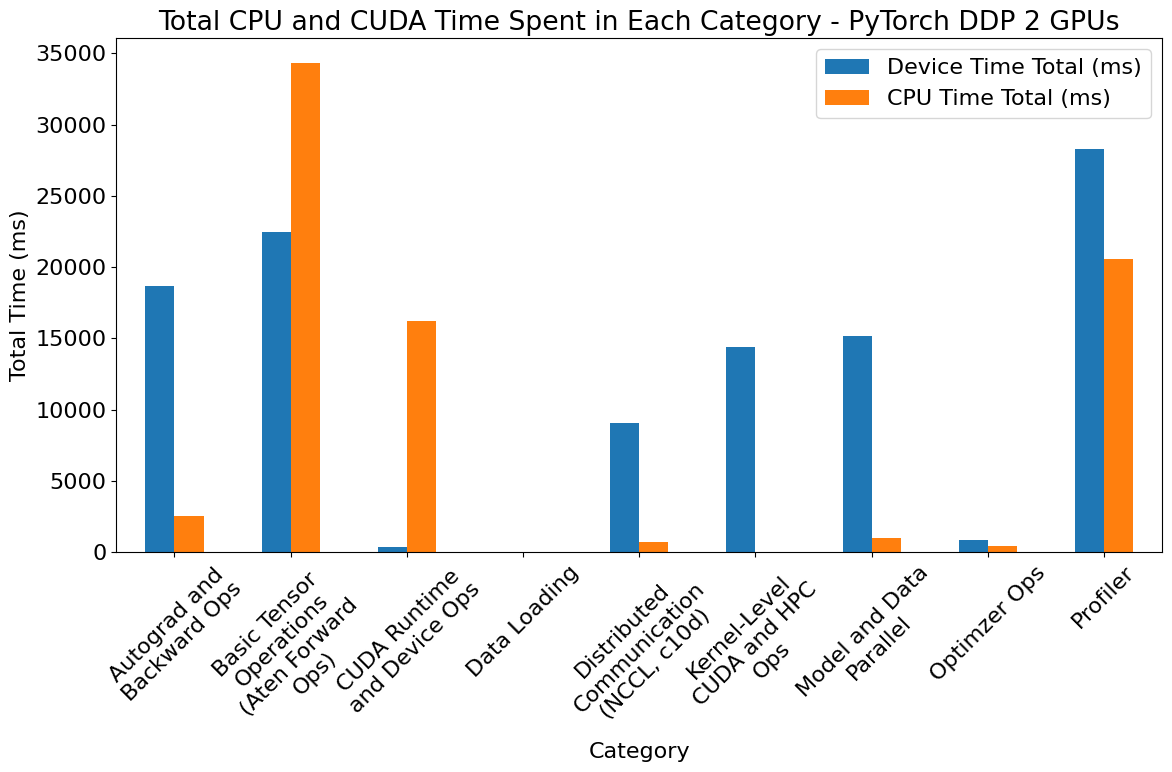

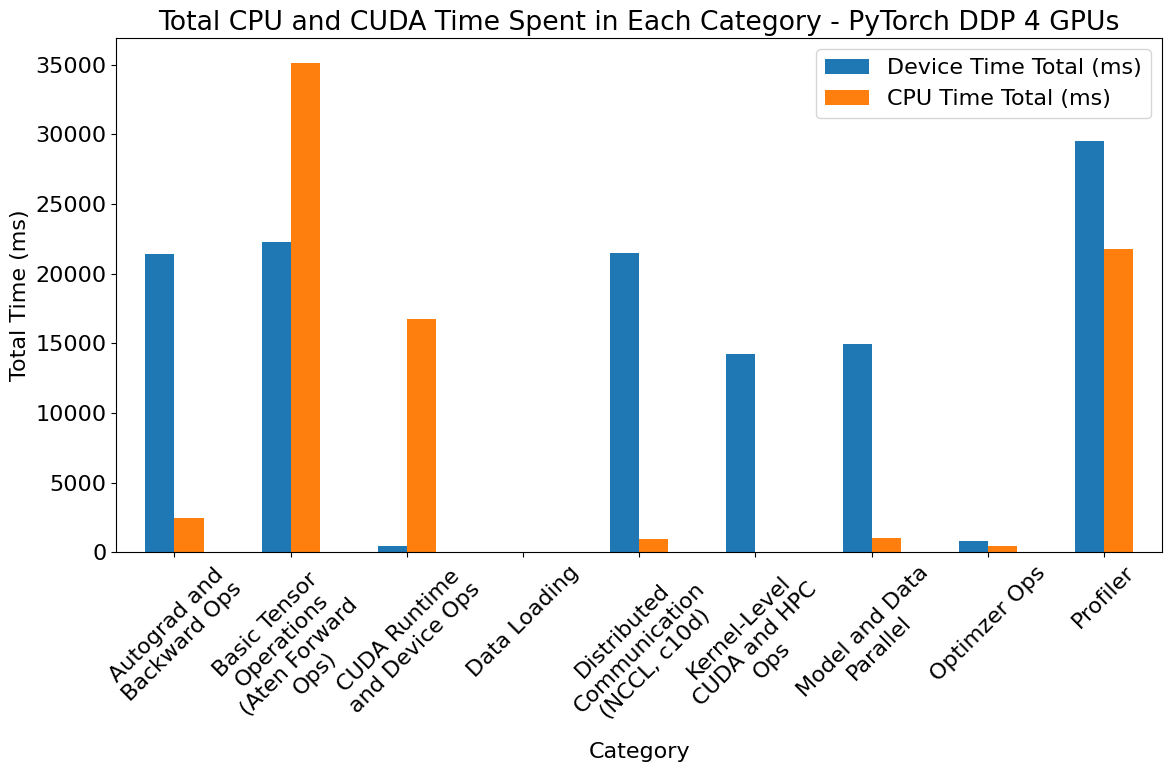

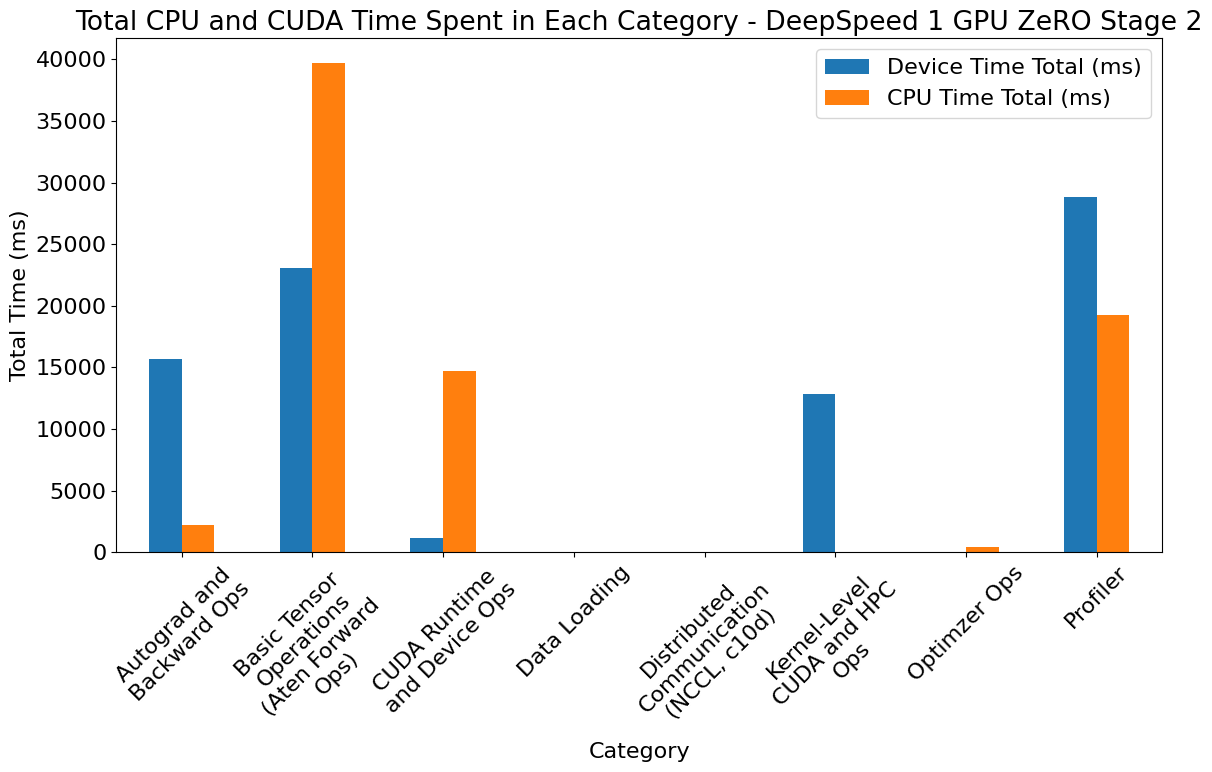

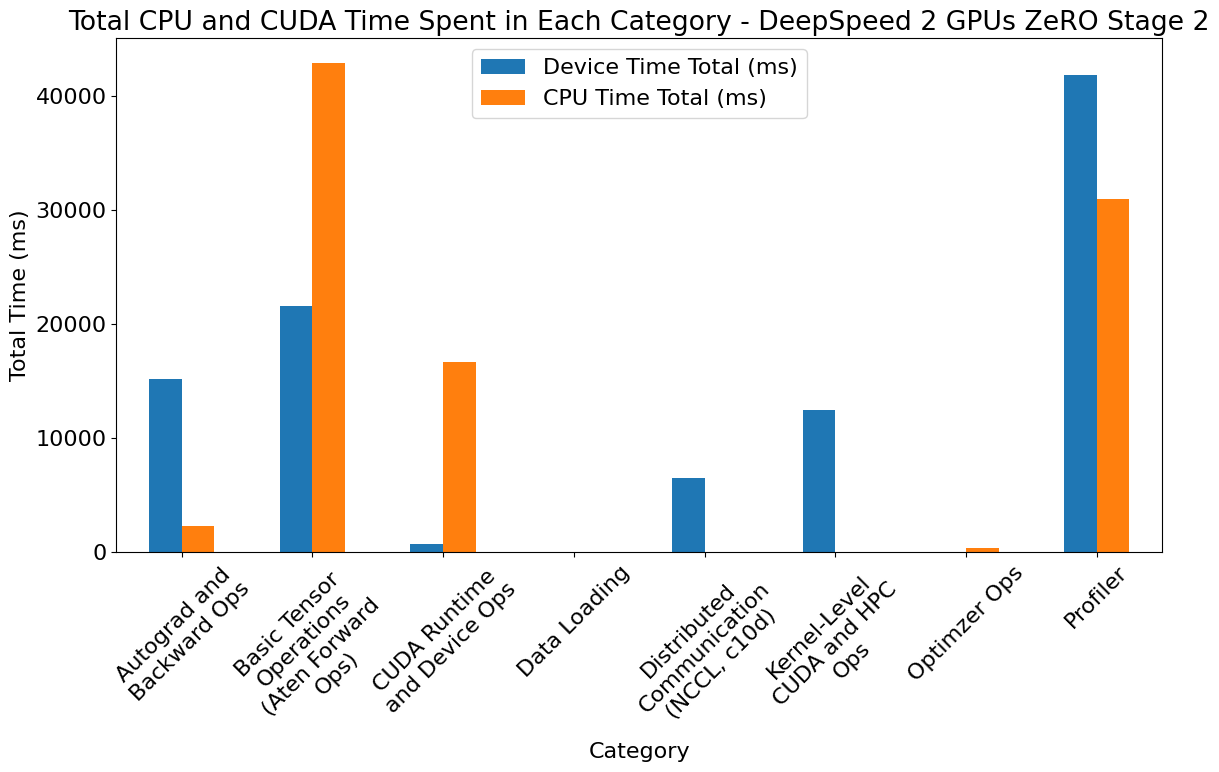

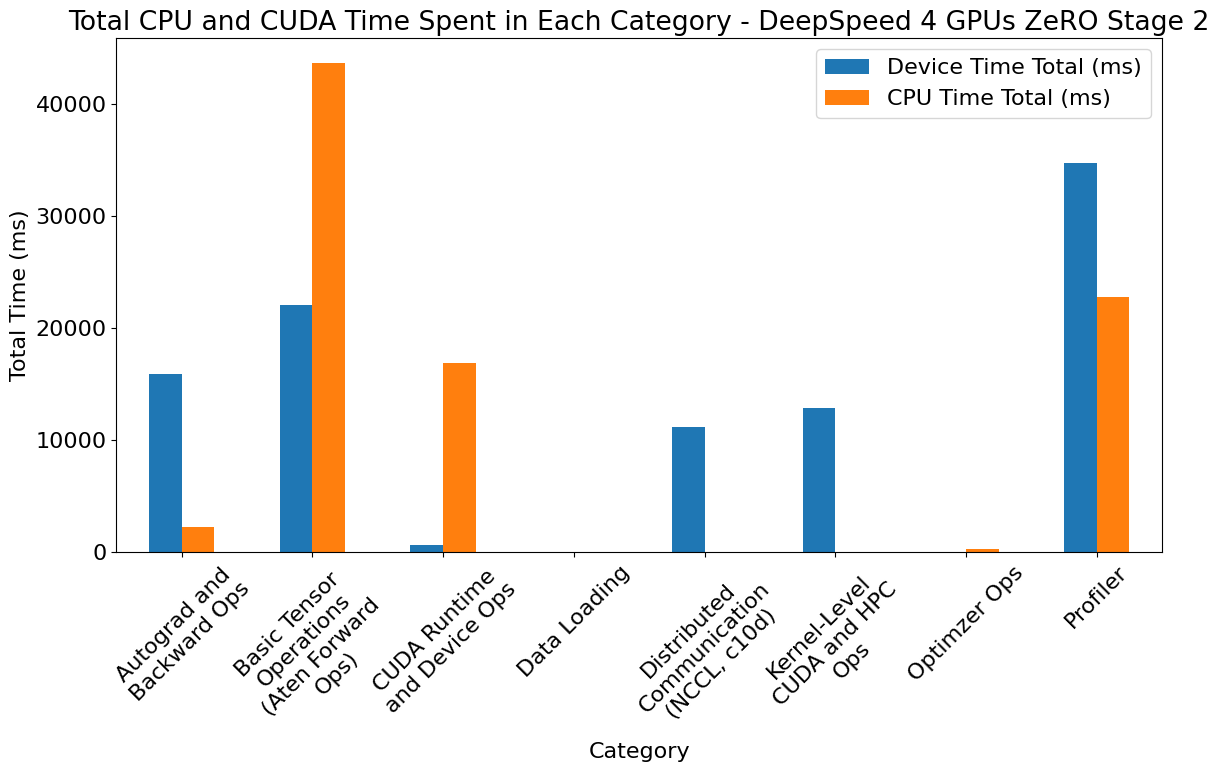

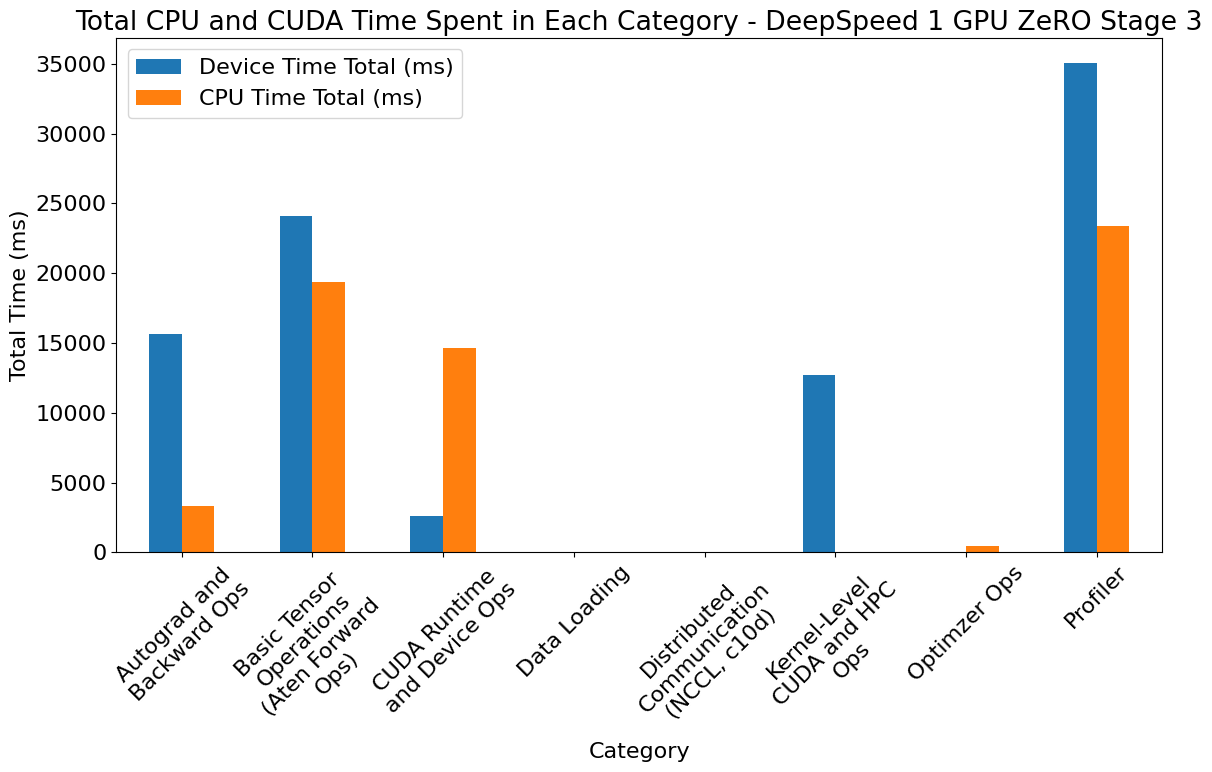

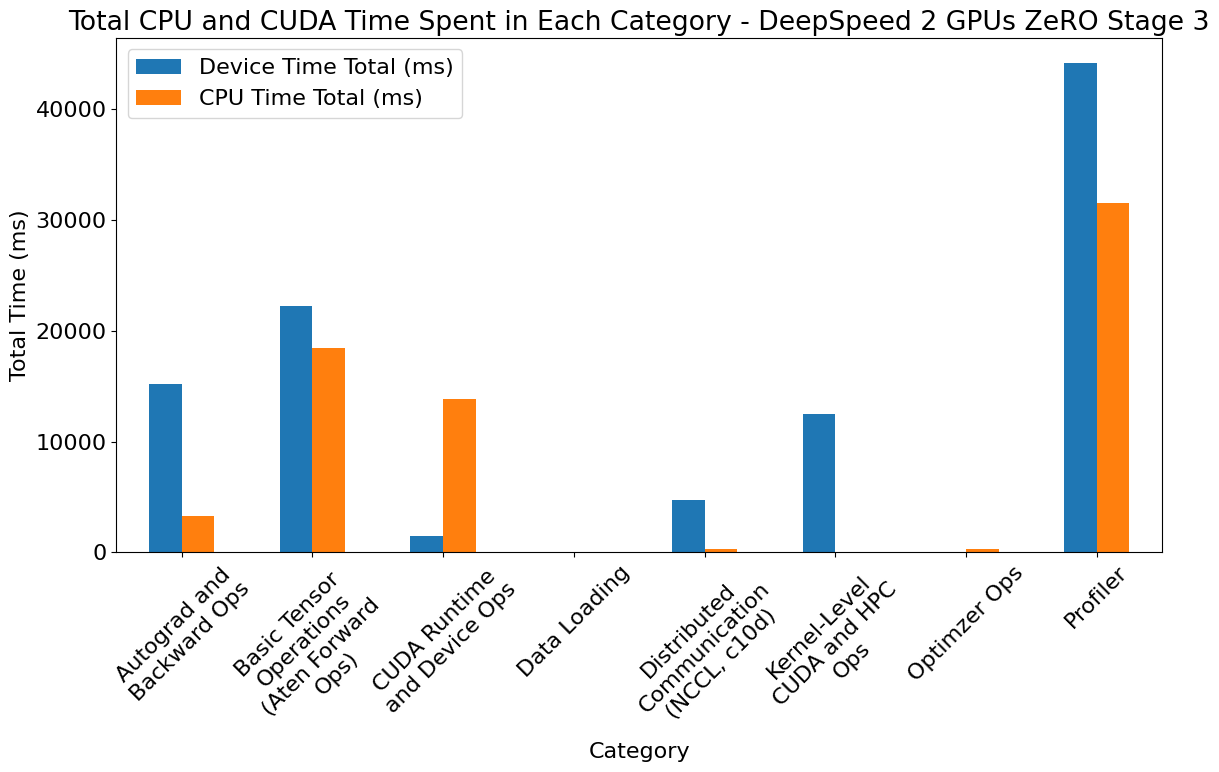

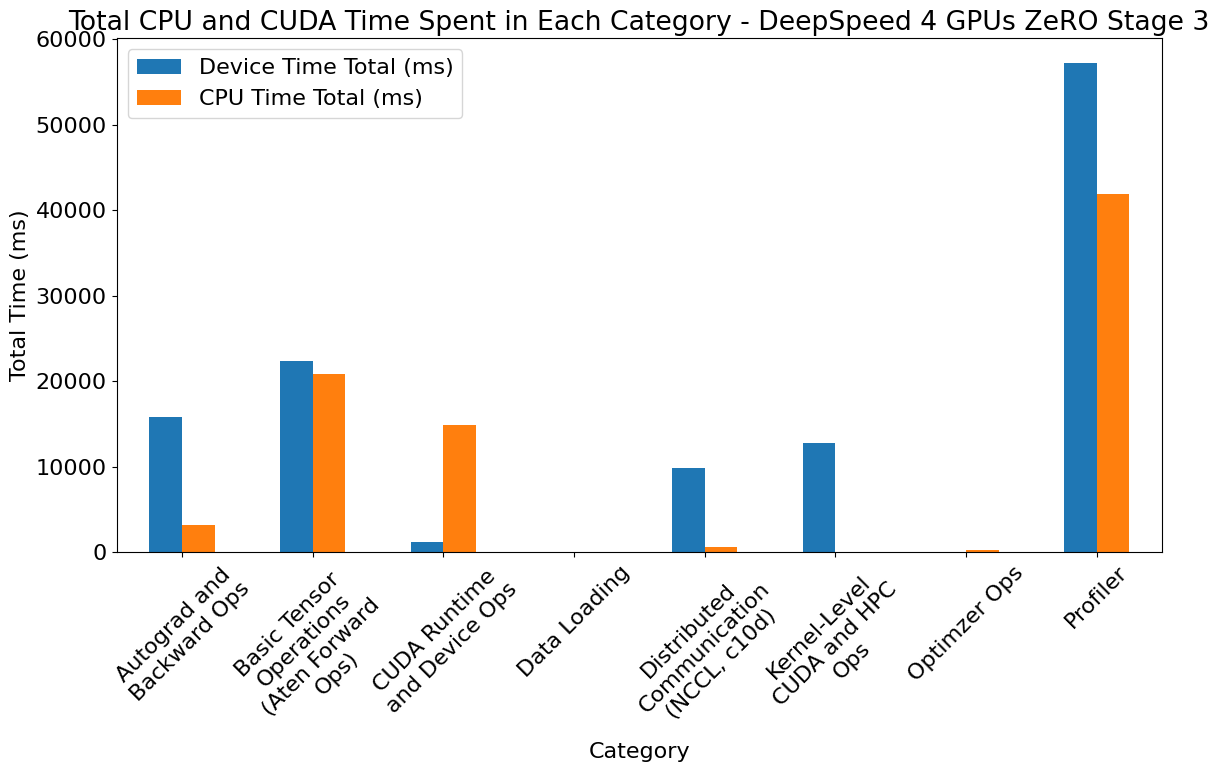

In [157]:
import os

# File paths for all 12 runs
# wandb\wandb_export_2024-12-10T17_17_56.804-05_00-pytorch-1GPU.csv
# wandb\wandb_export_2024-12-10T17_19_32.285-05_00-DP-2GPU.csv
# wandb\wandb_export_2024-12-10T17_19_54.712-05_00-DP-4GPU.csv
# wandb\wandb_export_2024-12-10T17_20_13.028-05_00-DDP-1GPU.csv
# wandb\wandb_export_2024-12-10T17_20_39.123-05_00-DDP-2GPU.csv
# wandb\wandb_export_2024-12-10T17_20_52.951-05_00-DDP-4GPU.csv
# wandb\wandb_export_2024-12-10T17_21_18.306-05_00-deepspeed-1GPU-zero2.csv
# wandb\wandb_export_2024-12-10T17_21_47.538-05_00-deepspeed-2GPU-zero2.csv
# wandb\wandb_export_2024-12-10T17_22_01.688-05_00-deepspeed-4GPU-zero2.csv
# wandb\wandb_export_2024-12-10T17_33_27.500-05_00-deepspeed-1GPU-zero3.csv
# wandb\wandb_export_2024-12-10T17_36_11.561-05_00-deepspeed-2GPU-zero3.csv
# wandb\wandb_export_2024-12-10T17_36_57.711-05_00-deepspeed-4GPU-zero3.csv

# Load all CSV files from the directory
path_prefix = './wandb/'
name_postfix = 'Total CPU and CUDA Time'
run_name_file_path_mapping = {'PyTorch Only 1 GPU': './wandb/wandb_export_2024-12-10T17_17_56.804-05_00-pytorch-1GPU.csv',
                              'PyTorch DP 2 GPUs': './wandb/wandb_export_2024-12-10T17_19_32.285-05_00-DP-2GPU.csv',
                              'PyTorch DP 4 GPUs': './wandb/wandb_export_2024-12-10T17_19_54.712-05_00-DP-4GPU.csv',
                              'PyTorch DDP 1 GPU': './wandb/wandb_export_2024-12-10T17_20_13.028-05_00-DDP-1GPU.csv',
                              'PyTorch DDP 2 GPUs': './wandb/wandb_export_2024-12-10T17_20_39.123-05_00-DDP-2GPU.csv',
                              'PyTorch DDP 4 GPUs': './wandb/wandb_export_2024-12-10T17_20_52.951-05_00-DDP-4GPU.csv',
                              'DeepSpeed 1 GPU ZeRO Stage 2': './wandb/wandb_export_2024-12-10T17_21_18.306-05_00-deepspeed-1GPU-zero2.csv',
                              'DeepSpeed 2 GPUs ZeRO Stage 2': './wandb/wandb_export_2024-12-10T17_21_47.538-05_00-deepspeed-2GPU-zero2.csv',
                              'DeepSpeed 4 GPUs ZeRO Stage 2': './wandb/wandb_export_2024-12-10T17_22_01.688-05_00-deepspeed-4GPU-zero2.csv',
                              'DeepSpeed 1 GPU ZeRO Stage 3': './wandb/wandb_export_2024-12-10T17_33_27.500-05_00-deepspeed-1GPU-zero3.csv',
                              'DeepSpeed 2 GPUs ZeRO Stage 3': './wandb/wandb_export_2024-12-10T17_36_11.561-05_00-deepspeed-2GPU-zero3.csv',
                              'DeepSpeed 4 GPUs ZeRO Stage 3': './wandb/wandb_export_2024-12-10T17_36_57.711-05_00-deepspeed-4GPU-zero3.csv'}
csv_files = {run_name: pd.read_csv(file_path) for run_name, file_path in run_name_file_path_mapping.items()}

# Perform the same visualization on all 12 runs
# Keep those catagories that do not exist in any of the runs in the chart
for run_name, data in csv_files.items():
    data['Category'] = data['Name'].apply(classify_function)
    category_times = data.groupby('Category')[['Device Time Total (ms)', 'CPU Time Total (ms)']].sum()
    fig, ax = plt.subplots(figsize=(12, 8))
    category_times.plot(kind='bar', ax=ax, log=False)
    ax.set_xticklabels([textwrap.fill(text, 15) for text in category_times.index], rotation=45, ha='center')
    ax.set_xlabel('Category')
    ax.set_ylabel('Total Time (ms)')
    ax.set_title(f'Total CPU and CUDA Time Spent in Each Category - {run_name}')
    plt.tight_layout()
    plt.rcParams.update({'font.size': 16})
    plt.show()


In [158]:
# Row: Run Name, Column: Category, Value: Total Time (ms)
category_times = {run_name: data.groupby('Category')[['Device Time Total (ms)', 'CPU Time Total (ms)']].sum()
                  for run_name, data in csv_files.items()}
category_times_df = pd.concat(category_times, axis=1)
category_times_df.columns.names = ['Run Name', 'Metric']
category_times_df

Run Name                                       PyTorch Only 1 GPU  \
Metric                                     Device Time Total (ms)   
Category                                                            
Autograd and Backward Ops                            23760.591669   
Basic Tensor Operations (Aten Forward Ops)           29800.959626   
CUDA Runtime and Device Ops                            319.852929   
Data Loading                                             0.000000   
Kernel-Level CUDA and HPC Ops                        19197.949373   
Optimzer Ops                                          1265.405800   
Profiler                                             35226.202388   
Distributed Communication (NCCL, c10d)                        NaN   
Model and Data Parallel                                       NaN   

Run Name                                                        \
Metric                                     CPU Time Total (ms)   
Category                                                         
Autograd and Backward Ops                          2866.737676   
Basic Tensor Operations (Aten Forward Ops)        50135.644800   
CUDA Runtime and Device Ops                       21217.759625   
Data Loading                                         13.629213   
Kernel-Level CUDA and HPC Ops                         0.000000   
Optimzer Ops                                         89.000781   
Profiler                                          25612.431311   
Distributed Communication (NCCL, c10d)                     NaN   
Model and Data Parallel                                    NaN   

Run Name                                        PyTorch DP 2 GPUs  \
Metric                                     Device Time Total (ms)   
Category                                                            
Autograd and Backward Ops                            25559.916065   
Basic Tensor Operations (Aten Forward Ops)           15780.014857   
CUDA Runtime and Device Ops                           2779.354579   
Data Loading                                             0.000000   
Kernel-Level CUDA and HPC Ops                        18580.774902   
Optimzer Ops                                          1262.024717   
Profiler                                             25050.393897   
Distributed Communication (NCCL, c10d)                9714.277564   
Model and Data Parallel                              22120.784974   

Run Name                                                        \
Metric                                     CPU Time Total (ms)   
Category                                                         
Autograd and Backward Ops                          4093.905321   
Basic Tensor Operations (Aten Forward Ops)        33321.685256   
CUDA Runtime and Device Ops                       15026.678229   
Data Loading                                         11.600007   
Kernel-Level CUDA and HPC Ops                         0.000000   
Optimzer Ops                                         93.265941   
Profiler                                          20090.089912   
Distributed Communication (NCCL, c10d)              427.683648   
Model and Data Parallel                            1281.578321   

Run Name                                        PyTorch DP 4 GPUs  \
Metric                                     Device Time Total (ms)   
Category                                                            
Autograd and Backward Ops                            33636.047064   
Basic Tensor Operations (Aten Forward Ops)           16843.383476   
CUDA Runtime and Device Ops                           3628.548435   
Data Loading                                             0.000000   
Kernel-Level CUDA and HPC Ops                        17999.690030   
Optimzer Ops                                          1261.320826   
Profiler                                             28686.506780   
Distributed Communication (NCCL, c10d)               29868.726396 

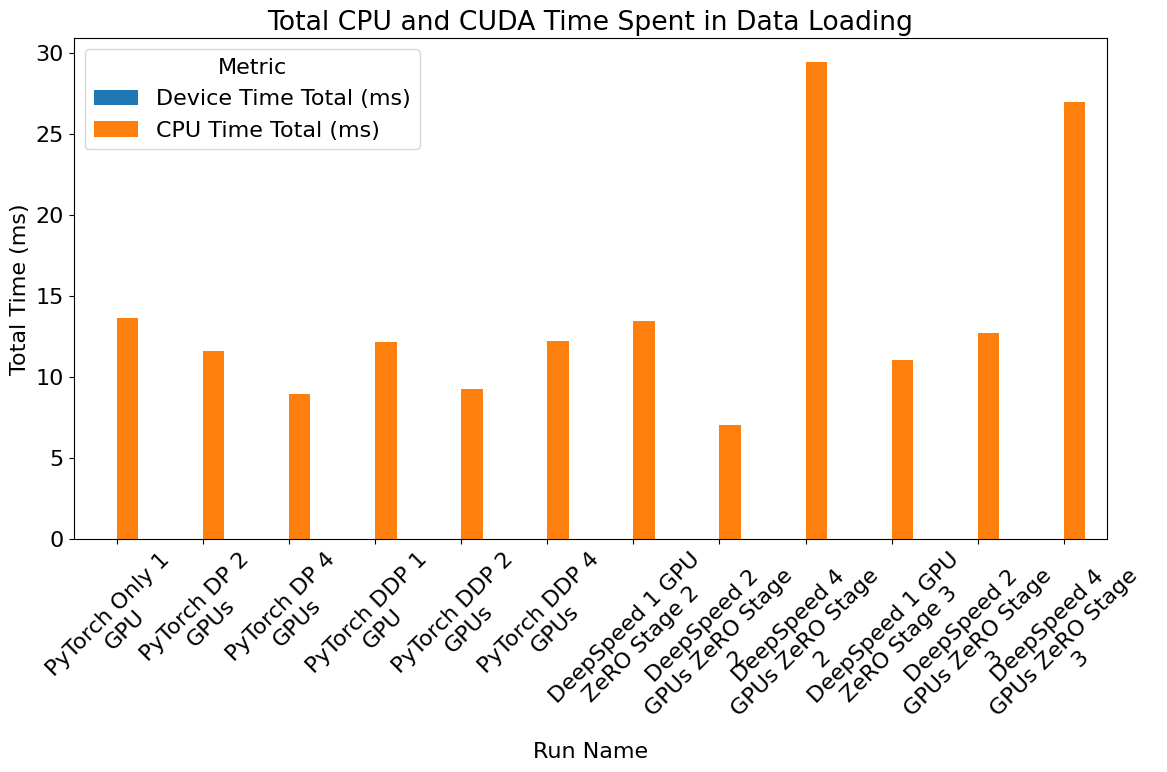

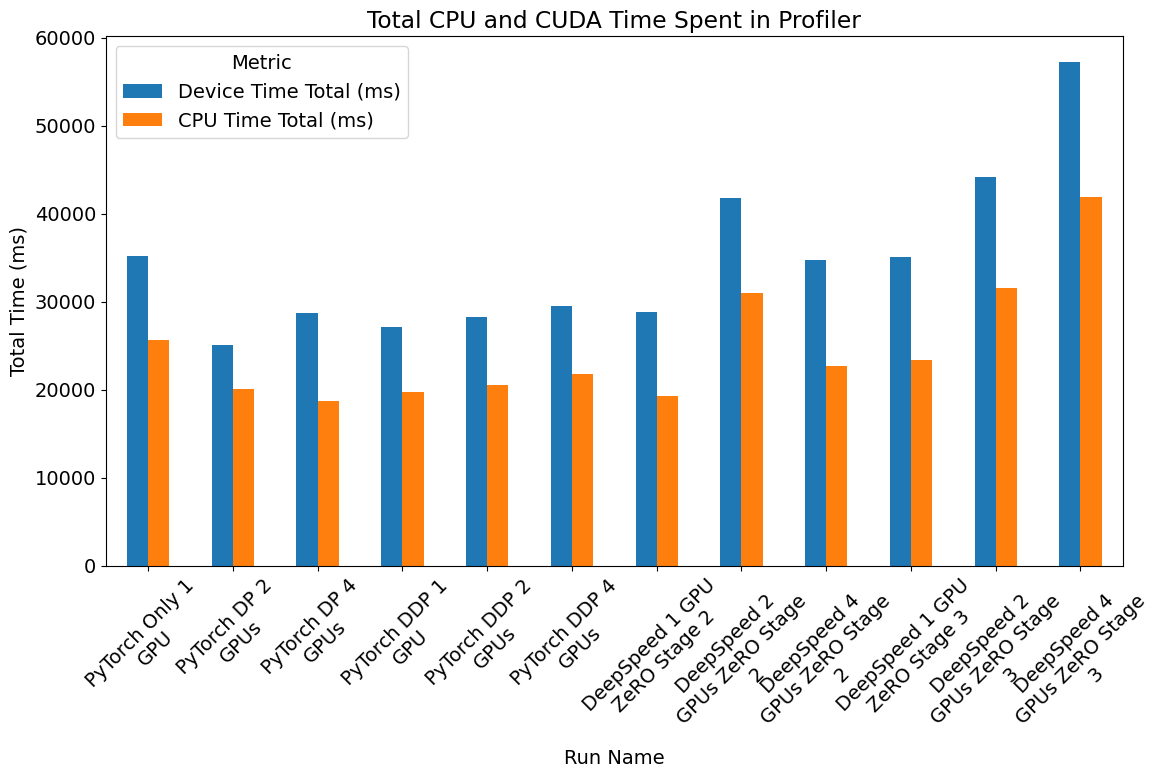

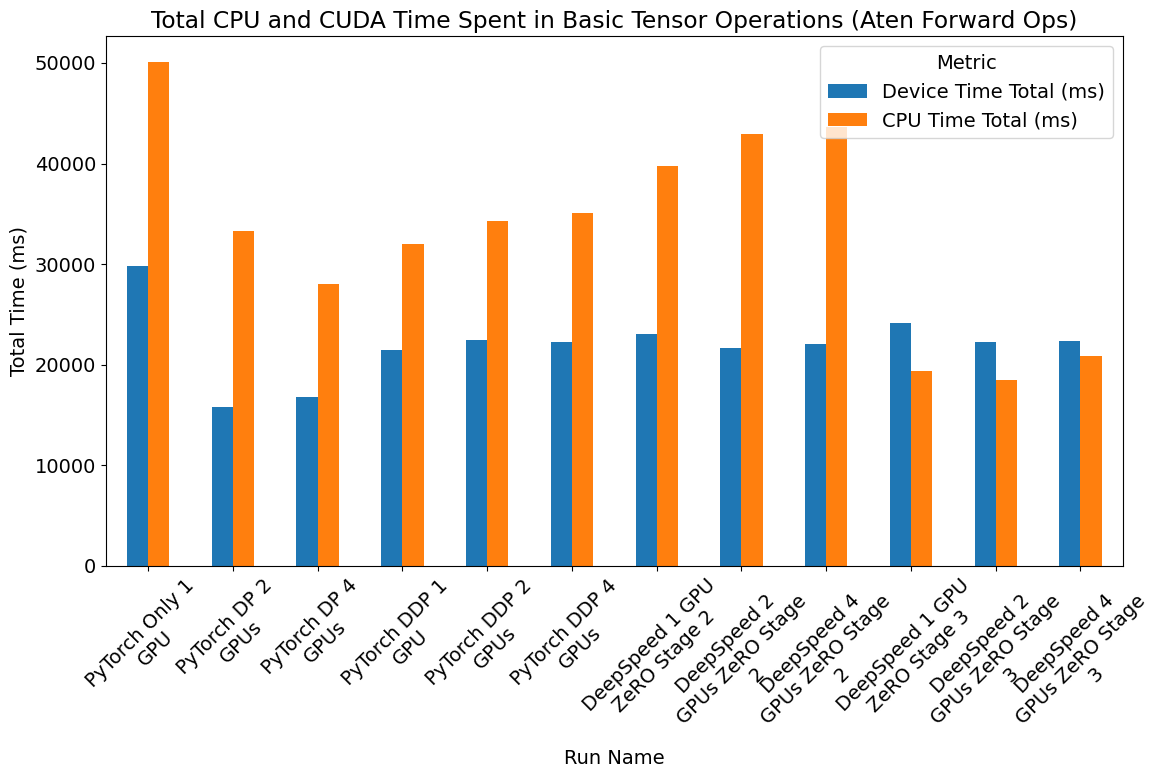

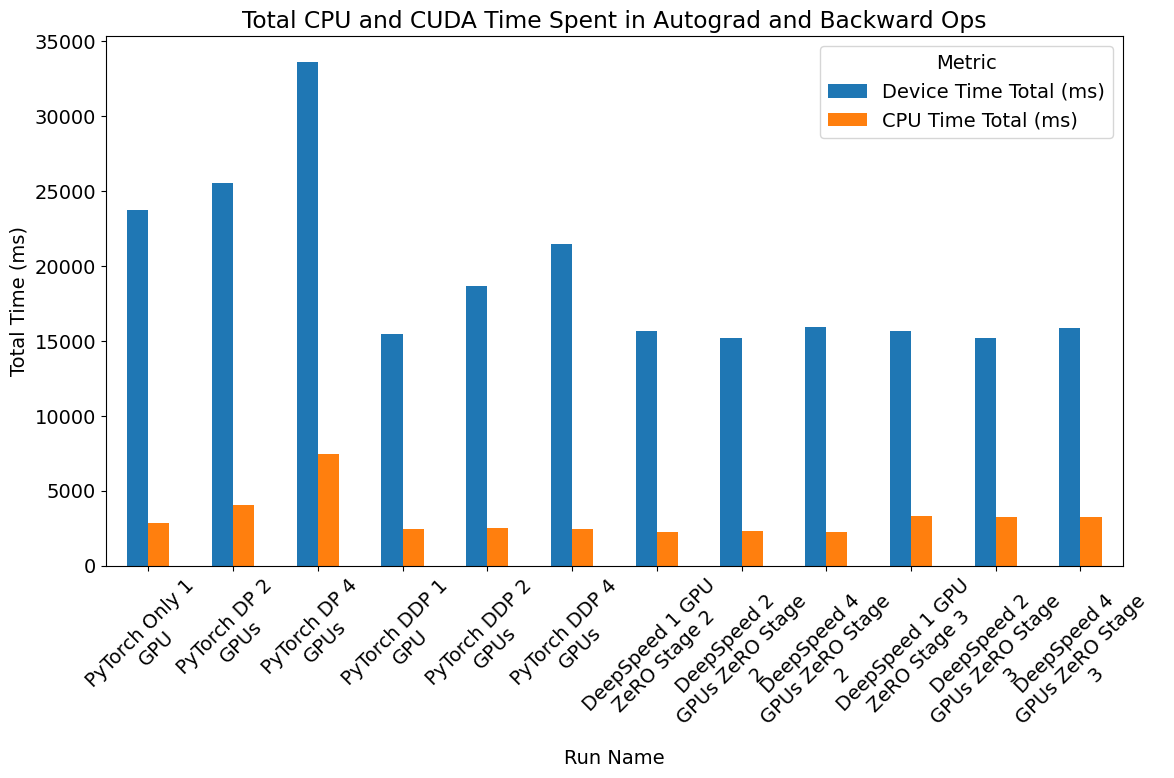

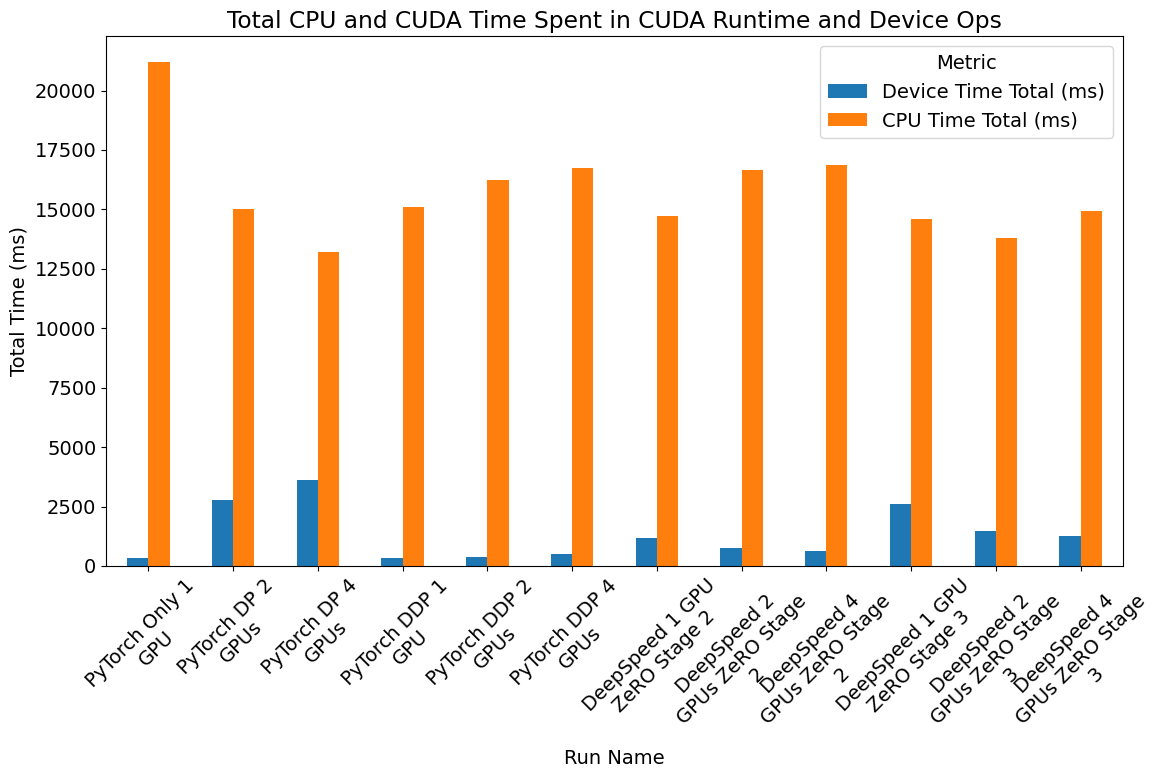

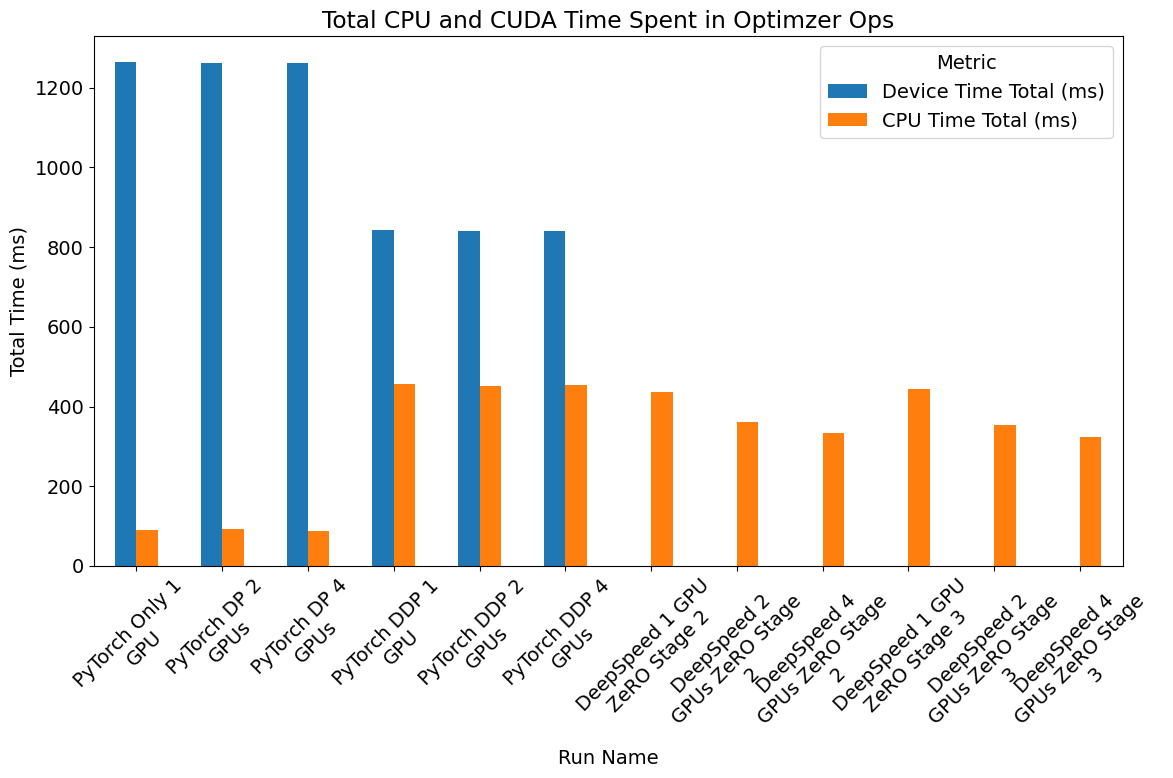

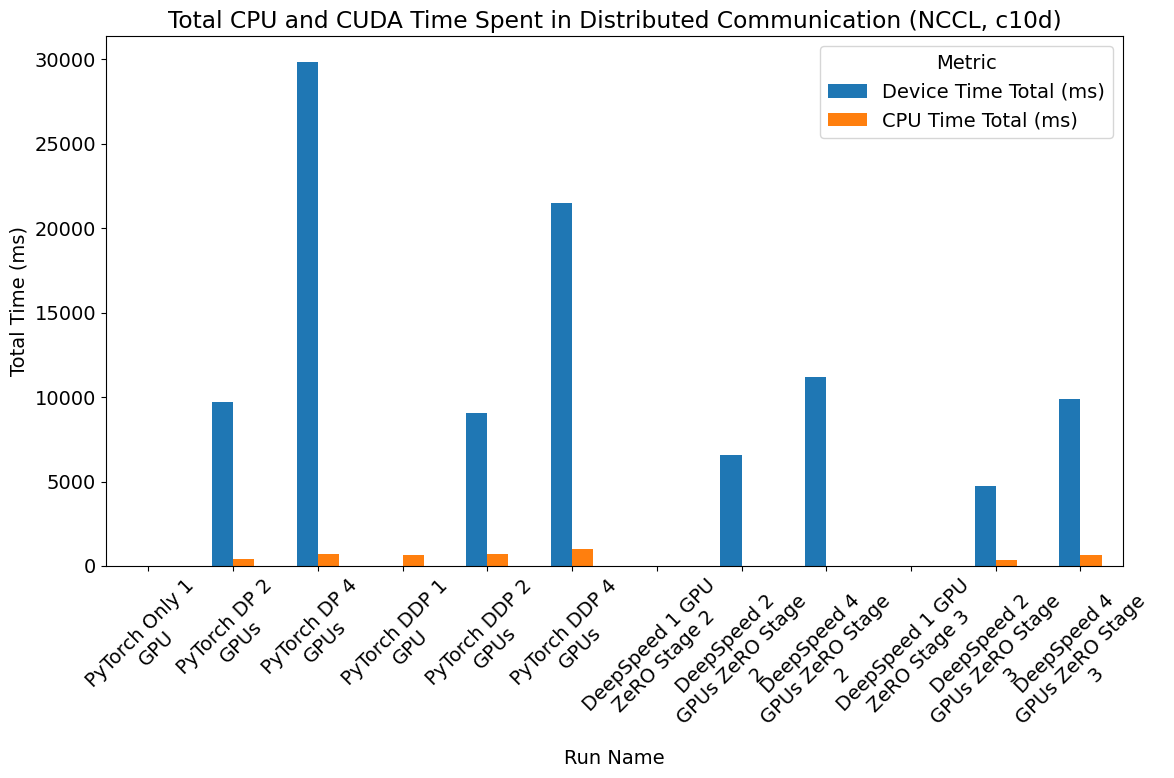

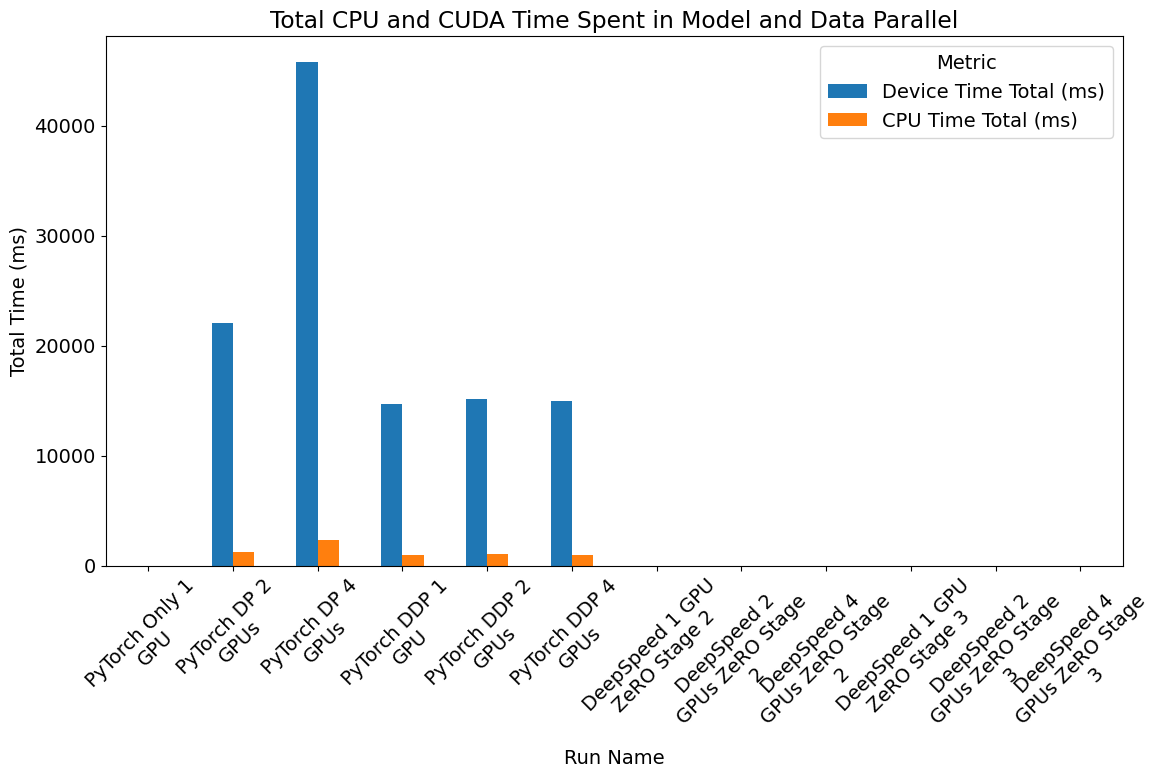

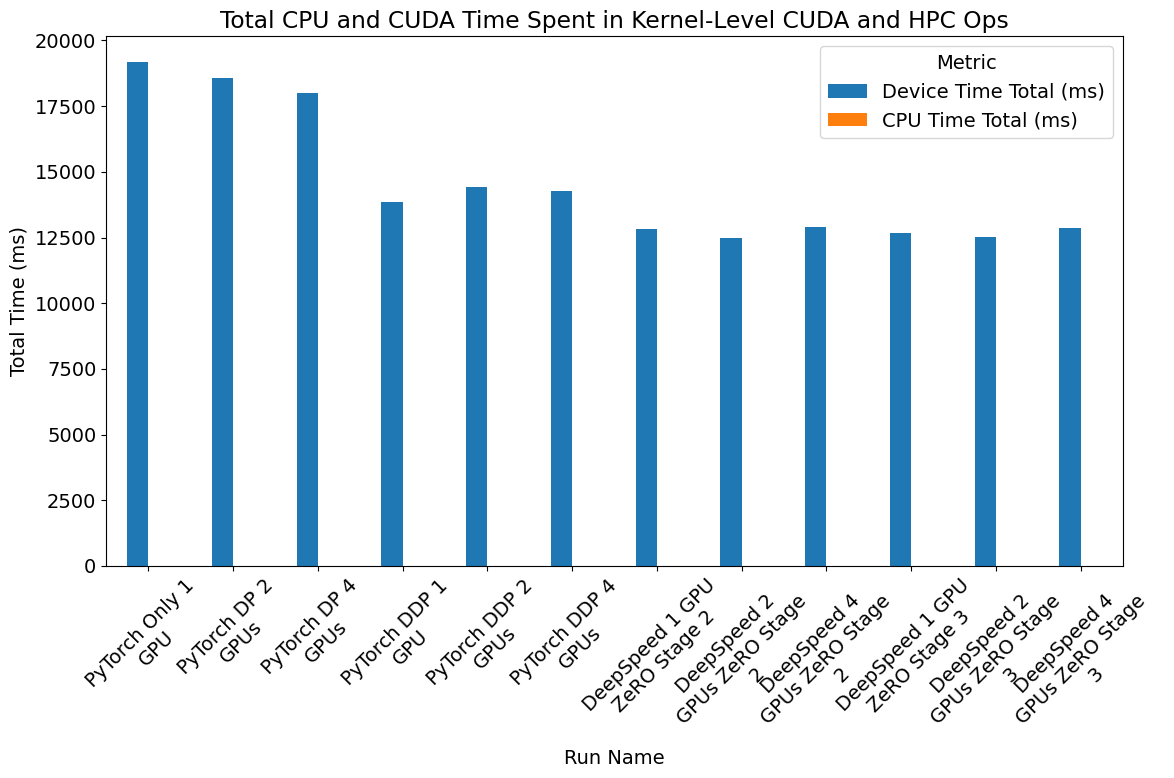

In [159]:
# Keep those categories that do not exist in any of the runs out of the chart 
# Generate 9 plots, one for each category; each plot with all runs that contains this category, showing the Device time total and CPU time total in two separate bars
for category in categories.keys():
    if category not in category_times_df.index:
        continue
    fig, ax = plt.subplots(figsize=(12, 8))
    category_data = category_times_df.loc[category].unstack()
    category_data.plot(kind='bar', ax=ax, log=False)
    ax.set_xticks(range(len(category_data.index)))
    ax.set_xticklabels([textwrap.fill(text, 15) for text in category_data.index], rotation=45, ha='center')
    ax.set_xlabel('Run Name')
    ax.set_ylabel('Total Time (ms)')
    ax.set_title(f'Total CPU and CUDA Time Spent in {category}')
    plt.tight_layout()
    plt.rcParams.update({'font.size': 14})
    plt.show()


                               Device Time Total (ms)  CPU Time Total (ms)
Run Name                                                                  
PyTorch Only 1 GPU                      109570.961785         99935.203406
PyTorch DP 2 GPUs                       120847.541555         74346.486635
PyTorch DP 4 GPUs                       177771.412707         70517.728609
PyTorch DDP 1 GPU                        93714.063130         71385.114896
PyTorch DDP 2 GPUs                      109376.302799         75949.290325
PyTorch DDP 4 GPUs                      125309.306695         78568.032900
DeepSpeed 1 GPU ZeRO Stage 2             81570.787248         76438.901217
DeepSpeed 2 GPUs ZeRO Stage 2            98488.762884         93290.332747
DeepSpeed 4 GPUs ZeRO Stage 2            97477.643739         85932.731559
DeepSpeed 1 GPU ZeRO Stage 3             90126.822558         61104.722923
DeepSpeed 2 GPUs ZeRO Stage 3           100353.835636         67751.610304
DeepSpeed 4 GPUs ZeRO Sta

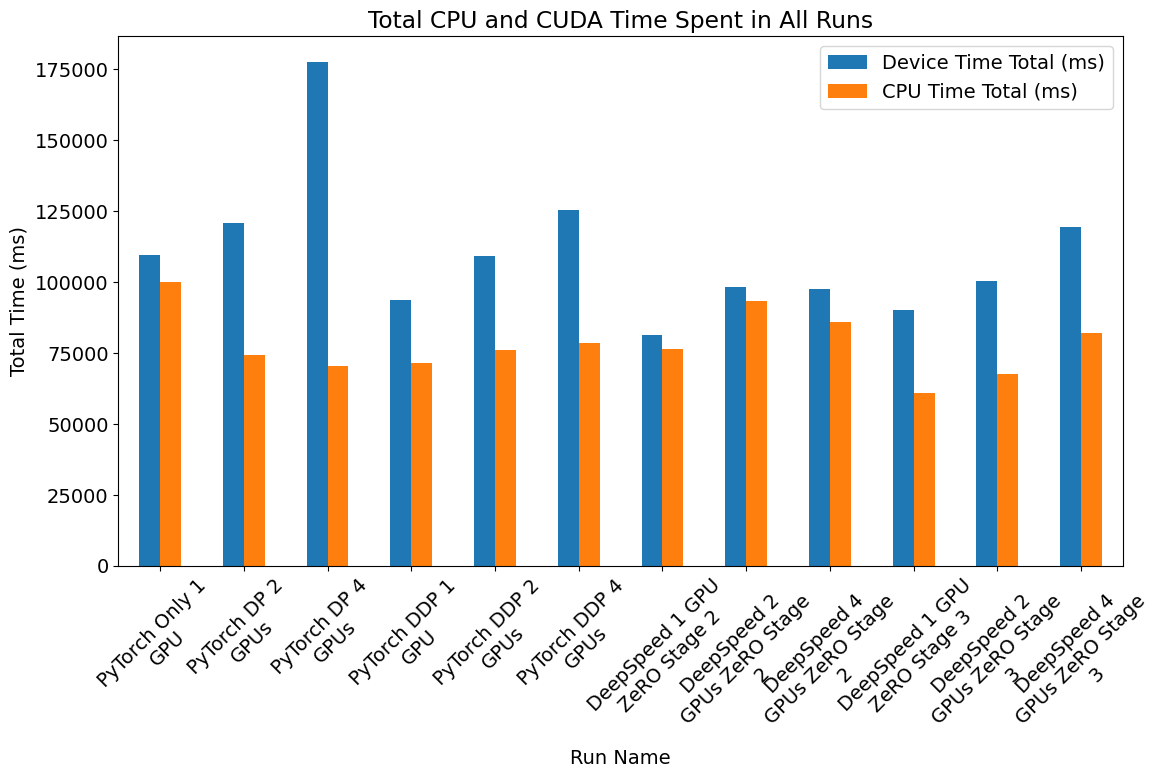

                               Self Device Time Total (ms)  \
Run Name                                                     
PyTorch Only 1 GPU                            68001.833968   
PyTorch DP 2 GPUs                             81362.057275   
PyTorch DP 4 GPUs                            118847.838616   
PyTorch DDP 1 GPU                             57355.321953   
PyTorch DDP 2 GPUs                            66822.110734   
PyTorch DDP 4 GPUs                            76858.476901   
DeepSpeed 1 GPU ZeRO Stage 2                  51125.275316   
DeepSpeed 2 GPUs ZeRO Stage 2                 66445.503067   
DeepSpeed 4 GPUs ZeRO Stage 2                 62296.734204   
DeepSpeed 1 GPU ZeRO Stage 3                  58668.952693   
DeepSpeed 2 GPUs ZeRO Stage 3                 68619.495694   
DeepSpeed 4 GPUs ZeRO Stage 3                 84729.598228   

                               Self CPU Time Total (ms)  
Run Name                                                 
PyTorch Only 1 

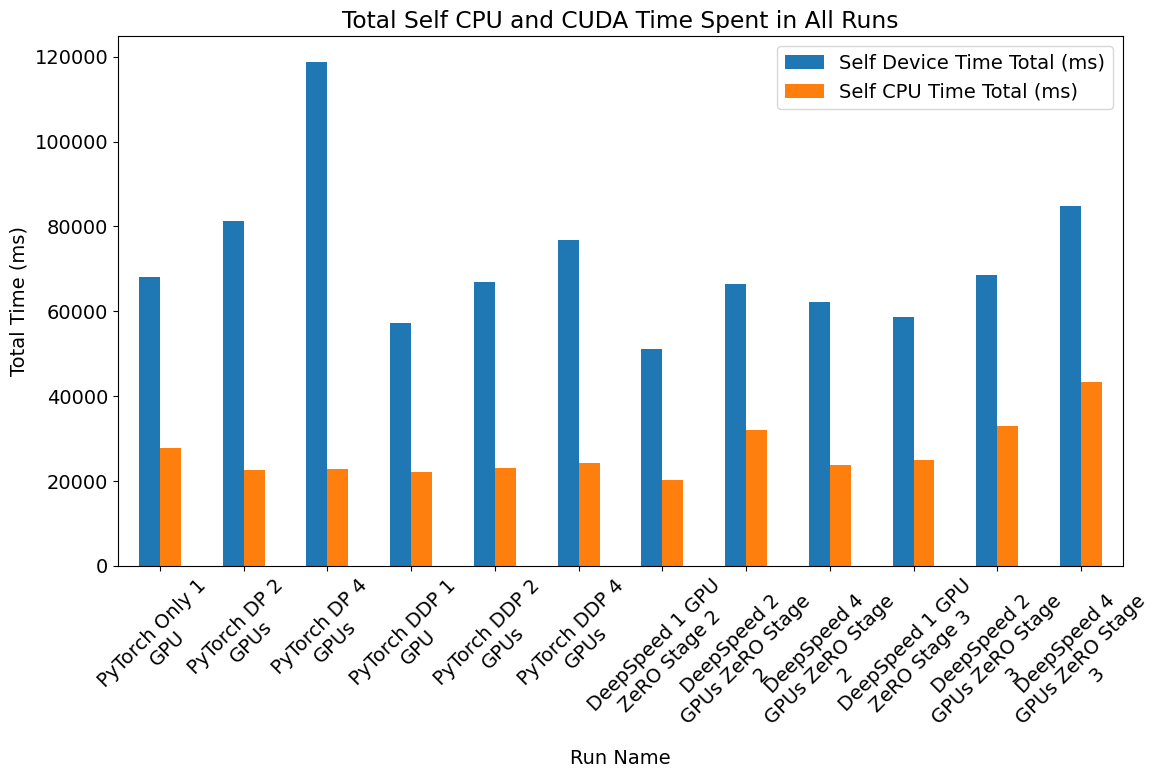

                               Device Time Total (ms)  CPU Time Total (ms)
Run Name                                                                  
PyTorch Only 1 GPU                       74344.759397         74322.772095
PyTorch DP 2 GPUs                        95797.147658         54256.396723
PyTorch DP 4 GPUs                       149084.905927         51836.999410
PyTorch DDP 1 GPU                        66591.702332         51686.579864
PyTorch DDP 2 GPUs                       81059.383216         55348.321022
PyTorch DDP 4 GPUs                       95803.049918         56818.804852
DeepSpeed 1 GPU ZeRO Stage 2             52770.244933         57153.127865
DeepSpeed 2 GPUs ZeRO Stage 2            56654.178283         62285.009203
DeepSpeed 4 GPUs ZeRO Stage 2            62734.267207         63184.083997
DeepSpeed 1 GPU ZeRO Stage 3             55048.991583         37736.579063
DeepSpeed 2 GPUs ZeRO Stage 3            56168.847854         36246.774219
DeepSpeed 4 GPUs ZeRO Sta

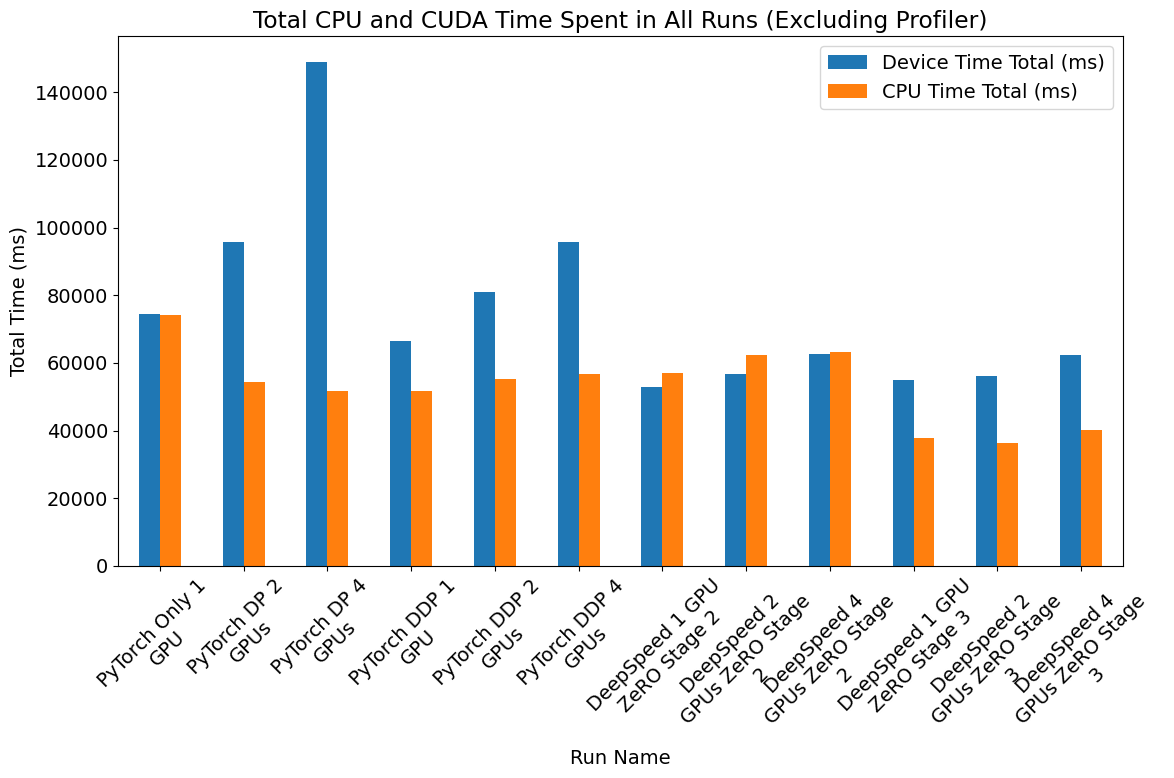

In [160]:
# Aggregate the total time spent in  ['Device Time Total (ms)', 'CPU Time Total (ms)'] for all runs
total_times = {run_name: data[['Device Time Total (ms)', 'CPU Time Total (ms)']].sum()
               for run_name, data in csv_files.items()}
total_times_df = pd.DataFrame(total_times).T
total_times_df.index.name = 'Run Name'
print(total_times_df)


plt.rcParams.update({'font.size': 14})

# Visualize the total time spent in ['Device Time Total (ms)', 'CPU Time Total (ms)'] for all runs
fig, ax = plt.subplots(figsize=(12, 8))
# Add a warped x-axis to avoid overlap
total_times_df.index = [textwrap.fill(text, 15) for text in total_times_df.index]
total_times_df.plot(kind='bar', ax=ax, log=False, rot=45)
ax.set_xlabel('Run Name')
ax.set_ylabel('Total Time (ms)')
ax.set_title('Total CPU and CUDA Time Spent in All Runs')
# Not Log scale for y-axis
plt.yscale('linear')
plt.tight_layout()
plt.show()


# Aggregate the Self CPU time total and Self CUDA time total for all runs
self_times = {run_name: data[['Self Device Time Total (ms)', 'Self CPU Time Total (ms)']].sum()
              for run_name, data in csv_files.items()}
self_times_df = pd.DataFrame(self_times).T
self_times_df.index.name = 'Run Name'
print(self_times_df)

# Visualize the Self CPU time total and Self CUDA time total for all runs
fig, ax = plt.subplots(figsize=(12, 8))
# Add a warped x-axis to avoid overlap
self_times_df.index = [textwrap.fill(text, 15) for text in self_times_df.index]
self_times_df.plot(kind='bar', ax=ax, rot=45)
ax.set_xlabel('Run Name')
ax.set_ylabel('Total Time (ms)')
ax.set_title('Total Self CPU and CUDA Time Spent in All Runs')
plt.tight_layout()
plt.show()

# Aggregate the total time spent in  ['Device Time Total (ms)', 'CPU Time Total (ms)'] for all runs BUT remove profiler rows
total_times_no_profiler = {run_name: data[~data['Name'].str.contains('Profiler')][['Device Time Total (ms)', 'CPU Time Total (ms)']].sum()
                            for run_name, data in csv_files.items()}
total_times_no_profiler_df = pd.DataFrame(total_times_no_profiler).T
total_times_no_profiler_df.index.name = 'Run Name'
print(total_times_no_profiler_df)

# Visualize the total time spent in ['Device Time Total (ms)', 'CPU Time Total (ms)'] for all runs BUT remove profiler rows
fig, ax = plt.subplots(figsize=(12, 8))
# Add a warped x-axis to avoid overlap
total_times_no_profiler_df.index = [textwrap.fill(text, 15) for text in total_times_no_profiler_df.index]
total_times_no_profiler_df.plot(kind='bar', ax=ax, log=False, rot=45)
ax.set_xlabel('Run Name')
ax.set_ylabel('Total Time (ms)')
ax.set_title('Total CPU and CUDA Time Spent in All Runs (Excluding Profiler)')
# Not Log scale for y-axis
plt.yscale('linear')
plt.tight_layout()
plt.show()




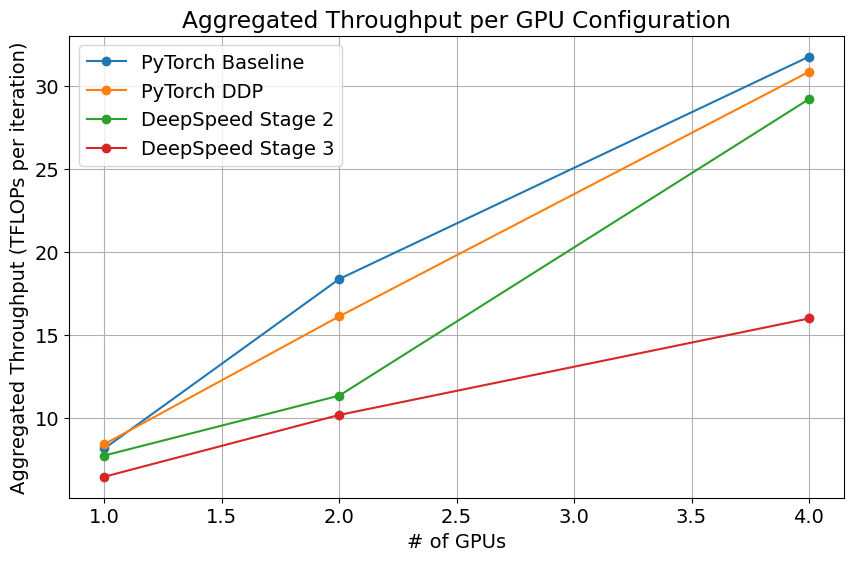

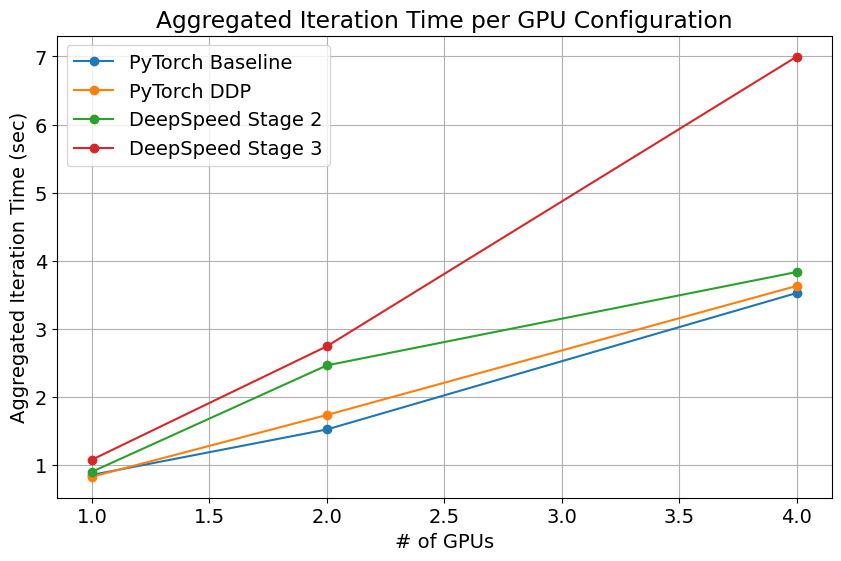

In [161]:
# Data preparation: Aggregating throughput and iteration time for all GPUs in each configuration
throughput_aggregated = {
    "PyTorch Baseline": [8.1849, 9.1924 + 9.1924, 7.9414 + 7.9414 + 7.9414 + 7.9414],
    "PyTorch DDP": [8.4467, 8.0681 + 8.0681, 7.7143 + 7.7143 + 7.7143 + 7.7143],
    "DeepSpeed Stage 2": [7.7618, 5.6882 + 5.6775, 7.2950 + 7.3213 + 7.2715 + 7.3236],
    "DeepSpeed Stage 3": [6.4852, 5.1064 + 5.0972, 4.0075 + 3.9970 + 4.0055 + 3.9997]
}

iteration_time_aggregated = {
    "PyTorch Baseline": [0.8552, 0.7614 + 0.7614, 0.8814 + 0.8814 + 0.8814 + 0.8814],
    "PyTorch DDP": [0.8287, 0.8676 + 0.8676, 0.9073 + 0.9073 + 0.9073 + 0.9073],
    "DeepSpeed Stage 2": [0.9018, 1.2305 + 1.2329, 0.9595 + 0.9561 + 0.9626 + 0.9557],
    "DeepSpeed Stage 3": [1.0793, 1.3707 + 1.3732, 1.7466 + 1.7512 + 1.7475 + 1.7500]
}

plt.rcParams.update({'font.size': 14})

# Aggregated Throughput Visualization
x_labels = [1, 2, 4]
plt.figure(figsize=(10, 6))
for label, data in throughput_aggregated.items():
    plt.plot(x_labels, data, marker='o', label=label)
plt.xlabel("# of GPUs")
plt.ylabel("Aggregated Throughput (TFLOPs per iteration)")
plt.title("Aggregated Throughput per GPU Configuration")
plt.legend()
plt.grid()
plt.show()

# Aggregated Iteration Time Visualization
plt.figure(figsize=(10, 6))
for label, data in iteration_time_aggregated.items():
    plt.plot(x_labels, data, marker='o', label=label)

plt.xlabel("# of GPUs")
plt.ylabel("Aggregated Iteration Time (sec)")
plt.title("Aggregated Iteration Time per GPU Configuration")
plt.legend()
plt.grid()
plt.show()

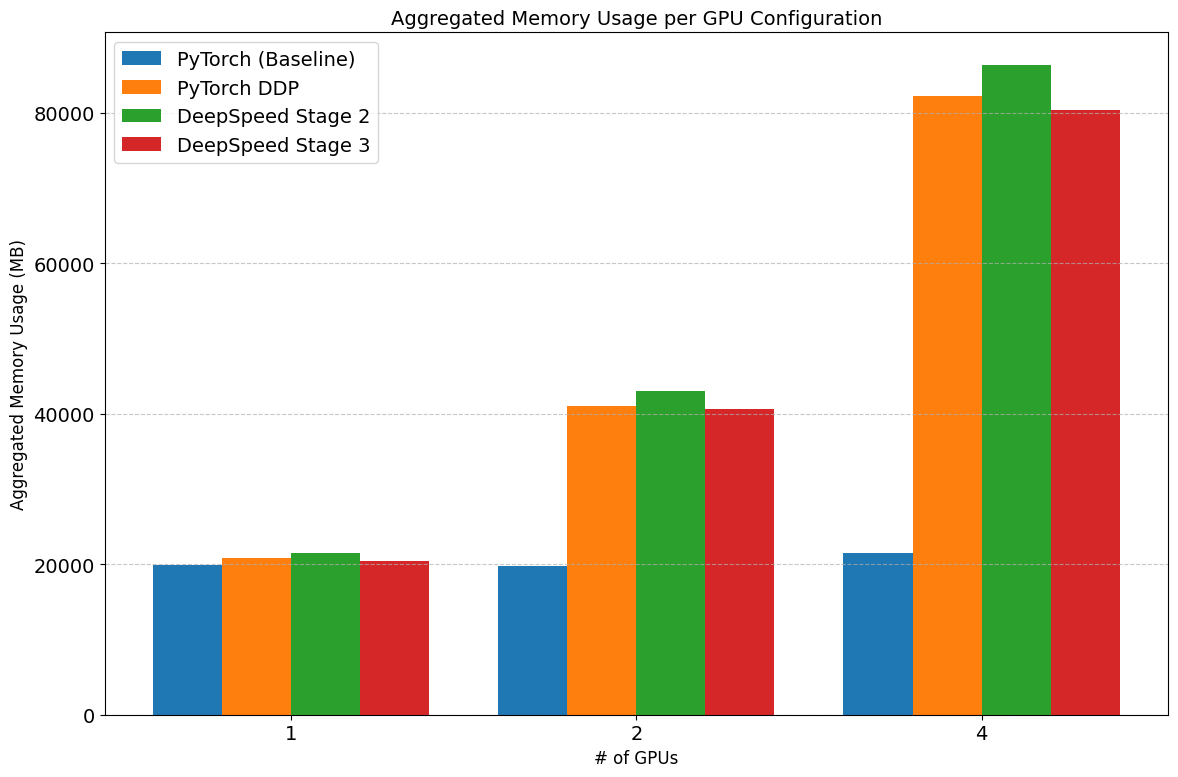

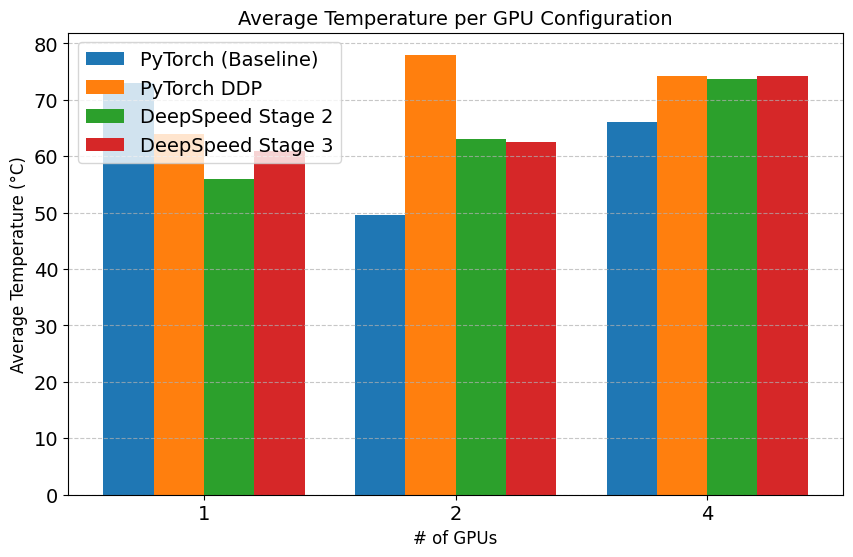

In [162]:
# Data extracted from the provided table
# Memory usage (MB) for different setups
memory_usage = {
    "PyTorch (Baseline)": [[19955], [11571, 8129], [7919, 4529, 4529, 4529]],
    "PyTorch DDP": [[20769], [20555, 20543], [20555, 20543, 20543, 20543]],
    "DeepSpeed Stage 2": [[21555], [21515, 21489], [21885, 21501, 21503, 21487]],
    "DeepSpeed Stage 3": [[20369], [20345, 20333], [20115, 20103, 20103, 20103]],
}

# Temperature (°C) for different setups
temperature = {
    "PyTorch (Baseline)": [[73.0], [49.0, 50.0], [76.0, 63.0, 61.0, 64.0]],
    "PyTorch DDP": [[64.0], [78.0, 78.0], [75.0, 72.0, 74.0, 76.0]],
    "DeepSpeed Stage 2": [[56.0], [59.0, 67.0], [70.0, 76.0, 76.0, 73.0]],
    "DeepSpeed Stage 3": [[61.0], [58.0, 67.0], [70.0, 75.0, 77.0, 75.0]],
}

# Memory Usage Visualization
# Plot memory usage for different configurations in bar chart
# Sum of memory usage for all GPUs in each configuration
memory_aggregated = {label: [sum(gpu_memory) for gpu_memory in data] for label, data in memory_usage.items()}

# X-axis labels for different number of GPUs
x_labels = [1, 2, 4]

plt.rcParams.update({'font.size': 14})

# Bar width for grouped bar chart
bar_width = 0.2
x_positions = np.arange(len(x_labels))

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
for idx, (label, data) in enumerate(memory_aggregated.items()):
    plt.bar(x_positions + idx * bar_width, data, bar_width, label=label)

# Adding labels and legend
plt.xlabel("# of GPUs", fontsize=12)
plt.ylabel("Aggregated Memory Usage (MB)", fontsize=12)
plt.title("Aggregated Memory Usage per GPU Configuration", fontsize=14)
plt.xticks(x_positions + bar_width * (len(memory_aggregated) - 1) / 2, x_labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

plt.rcParams.update({'font.size': 14})
# Temperature Visualization
# Plot temperature for different configurations in bar chart
# Average temperature for all GPUs in each configuration
temperature_averaged = {label: [np.mean(gpu_temp) for gpu_temp in data] for label, data in temperature.items()}
x_labels = [1, 2, 4]

plt.figure(figsize=(10, 6))
for idx, (label, data) in enumerate(temperature_averaged.items()):
    plt.bar(x_positions + idx * bar_width, data, bar_width, label=label)
plt.xlabel("# of GPUs", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.title("Average Temperature per GPU Configuration", fontsize=14)
plt.xticks(x_positions + bar_width * (len(temperature_averaged) - 1) / 2, x_labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()






PyTorch (Baseline): [np.float64(0.8551751931508382), np.float64(0.7614468097686767), np.float64(0.8813926537831624)]
PyTorch DDP: [np.float64(0.8286765495936076), np.float64(0.867557668685913), np.float64(0.9073393861452739)]
DeepSpeed Stage 2: [np.float64(0.9017935991287231), np.float64(1.2317048152287802), np.float64(0.9584757447242737)]
DeepSpeed Stage 3: [np.float64(1.079308303197225), np.float64(1.3719703435897825), np.float64(1.7488335410753886)]


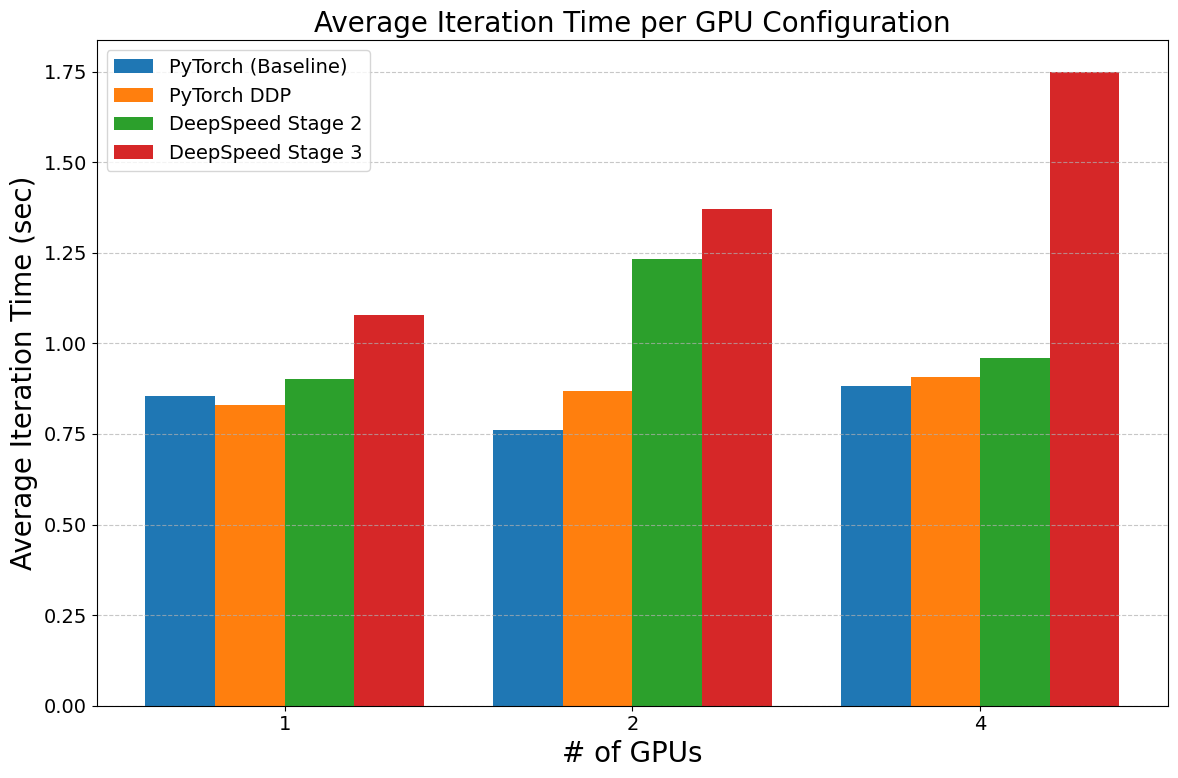

PyTorch (Baseline): [np.float64(0.0), np.float64(-0.0937283833821615), np.float64(0.02621746063232422)]
PyTorch DDP: [np.float64(0.0), np.float64(0.038881119092305405), np.float64(0.07866283655166628)]
DeepSpeed Stage 2: [np.float64(0.0), np.float64(0.329911216100057), np.float64(0.056682145595550515)]
DeepSpeed Stage 3: [np.float64(0.0), np.float64(0.2926620403925575), np.float64(0.6695252378781635)]


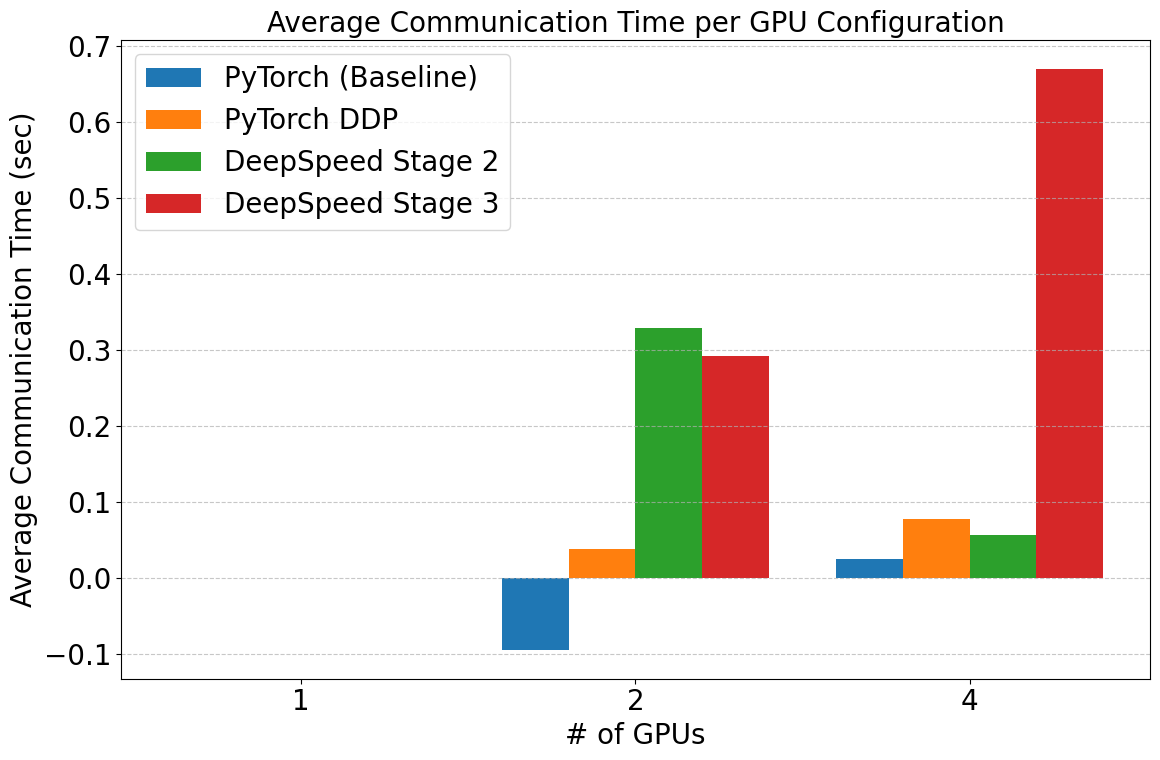

In [163]:
# Data extracted from the provided table
# Measured Time (sec) for different setups
avg_iter_time = {
    "PyTorch (Baseline)": [[0.8551751931508382], [0.7614468097686767, 0.7614468097686767], 
                           [0.8813926537831624, 0.8813926537831624, 0.8813926537831624, 0.8813926537831624]],
    "PyTorch DDP": [[0.8286765495936076], [0.8675604502360026, 0.8675548871358235], 
                    [0.9073401848475139, 0.907338269551595, 0.9073394298553467, 0.9073396603266398]],
    "DeepSpeed Stage 2": [[0.9017935991287231], [1.2305411338806151, 1.232868496576945], 
                          [0.9595047076543172, 0.9560526768366496, 0.9625981092453003, 0.9557474851608276]],
    "DeepSpeed Stage 3": [[1.079308303197225], [1.3707317988077798, 1.3732088883717855], 
                          [1.7466243823369345, 1.7512126843134561, 1.7474768956502278, 1.7500202020009359]],
}

# Average Iteration Time Visualization
# Plot average iteration time for different configurations in bar chart
# Average iteration time for all GPUs in each configuration
avg_iter_time_aggregated = {label: [np.mean(gpu_time) for gpu_time in data] for label, data in avg_iter_time.items()}
for k, v in avg_iter_time_aggregated.items():
    print(f'{k}: {v}')  
x_labels = [1, 2, 4]

# Bar width for grouped bar chart
bar_width = 0.2
x_positions = np.arange(len(x_labels))

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
for idx, (label, data) in enumerate(avg_iter_time_aggregated.items()):
    plt.bar(x_positions + idx * bar_width, data, bar_width, label=label)

# Adding labels and legend
plt.xlabel("# of GPUs", fontsize=20)
plt.ylabel("Average Iteration Time (sec)", fontsize=20)
plt.title("Average Iteration Time per GPU Configuration", fontsize=20)
plt.xticks(x_positions + bar_width * (len(avg_iter_time_aggregated) - 1) / 2, x_labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.rcParams.update({'font.size': 20})
# Show the plot
plt.show()

# Calculate the average communication time for each configuration
# Communication time = Average Iteration Time - Iteration Time of 1 GPU of that configuration
avg_comm_time = {label: [gpu_time - data[0] for gpu_time in data] for label, data in avg_iter_time_aggregated.items()}
for k, v in avg_comm_time.items():
    print(f'{k}: {v}')

x_labels = [1, 2, 4]

# Bar width for grouped bar chart
bar_width = 0.2
x_positions = np.arange(len(x_labels))

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
for idx, (label, data) in enumerate(avg_comm_time.items()):
    plt.bar(x_positions + idx * bar_width, data, bar_width, label=label)

# Adding labels and legend
plt.xlabel("# of GPUs", fontsize=20)
plt.ylabel("Average Communication Time (sec)", fontsize=20)
plt.title("Average Communication Time per GPU Configuration", fontsize=20)
plt.xticks(x_positions + bar_width * (len(avg_comm_time) - 1) / 2, x_labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.rcParams.update({'font.size': 20})
# Show the plot
plt.show()


In [164]:
# # Load GPT-2 model and count the number of parameters and trainable parameters
# import torch
# from transformers import GPT2Model

# # Load the GPT-2 model
# model = GPT2Model.from_pretrained('gpt2')

# # Count the total number of parameters
# total_params = sum(p.numel() for p in model.parameters())
# print(f'Total number of parameters in GPT-2 model: {total_params}')

# # Count the total number of trainable parameters
# total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
# print(f'Total number of trainable parameters in GPT-2 model: {total_trainable_params}')

# # Destroy model to save memory
# del model